In [1]:
# !pip install yfinance PyPortfolioOpt bt

# Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Î∞±ÌÖåÏä§Ìä∏
- Í≥ºÍ±∞ Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïö©Ìï¥ Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Ï†ÑÎûµÏùò ÏÑ±Í≥ºÎ•º Í≤ÄÏ¶ùÌïòÎäî Í≥ºÏ†ï
- ex) "S&P500Í≥º ÎÇòÏä§Îã• 50:50ÏúºÎ°ú Ìà¨ÏûêÌñàÏùÑ Îïå Í≥ºÍ±∞ 10ÎÖÑÍ∞Ñ ÏàòÏùµÎ•†ÏùÄ Ïñ¥Îï†ÏùÑÍπå?", "Î≥ÄÎèôÏÑ±ÏùÑ ÎÇÆÏ∂îÍ∏∞ ÏúÑÌï¥ Íµ≠Ï±Ñ 30%Î•º Ï∂îÍ∞ÄÌñàÏùÑ Îïå Í≤∞Í≥ºÎäî?"

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# ÏúàÎèÑÏö∞ Í∏∞Î≥∏ ÌïúÍ∏Ä Ìè∞Ìä∏ 'Malgun Gothic' ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'Malgun Gothic'

# ÌïúÍ∏Ä Íπ®Ïßê Î∞©ÏßÄÎ•º ÏúÑÌïú ÎßàÏù¥ÎÑàÏä§ Í∏∞Ìò∏ ÏÑ§Ï†ï
plt.rcParams['axes.unicode_minus'] = False

In [3]:
import yfinance as yf
import pandas as pd

# 1. IEF Îç∞Ïù¥ÌÑ∞ Îã§Ïö¥Î°úÎìú Î∞è Ï≤òÎ¶¨
print("Downloading data for IEF ...")
ief_data = yf.download('IEF', start='2012-01-31', end='2025-05-01', interval='1d', progress=False)
ief_data['Ticker'] = 'IEF'

# IEF ÏõîÎ≥Ñ Îç∞Ïù¥ÌÑ∞ ÏßëÍ≥Ñ
ief_data['Date'] = ief_data.index
ief_data['YearMonth'] = ief_data['Date'].dt.to_period('M')
ief_monthly = ief_data.groupby(['YearMonth'])['Close'].last().reset_index()

# IEF Îç∞Ïù¥ÌÑ∞ CSVÎ°ú Ï†ÄÏû•
# ief_monthly.to_csv('IEF_monthly_data.csv', index=False)
# print("‚úÖ IEF ÏõîÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû• ÏôÑÎ£å.")

# 2. DBC Îç∞Ïù¥ÌÑ∞ Îã§Ïö¥Î°úÎìú Î∞è Ï≤òÎ¶¨
print("Downloading data for DBC ...")
dbc_data = yf.download('DBC', start='2012-01-31', end='2025-04-30', interval='1d', progress=False)
dbc_data['Ticker'] = 'DBC'

# DBC ÏõîÎ≥Ñ Îç∞Ïù¥ÌÑ∞ ÏßëÍ≥Ñ
dbc_data['Date'] = dbc_data.index
dbc_data['YearMonth'] = dbc_data['Date'].dt.to_period('M')
dbc_monthly = dbc_data.groupby(['YearMonth'])['Close'].last().reset_index()

# DBC Îç∞Ïù¥ÌÑ∞ CSVÎ°ú Ï†ÄÏû•
# dbc_monthly.to_csv('DBC_monthly_data.csv', index=False)
# print("‚úÖ DBC ÏõîÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû• ÏôÑÎ£å.")

YF.download() has changed argument auto_adjust default to True


In [4]:
ief_data.tail()

Price           Close       High        Low       Open    Volume Ticker  \
Ticker            IEF        IEF        IEF        IEF       IEF          
Date                                                                      
2025-04-24  94.540970  94.570871  94.311723  94.411396   7308900    IEF   
2025-04-25  94.899803  94.969575  94.670557  94.800130   5341300    IEF   
2025-04-28  95.278557  95.308465  94.760254  94.790155   4950500    IEF   
2025-04-29  95.607483  95.617452  95.218754  95.228724   5350200    IEF   
2025-04-30  95.756996  95.846707  95.487879  95.587552  13923200    IEF   

Price            Date YearMonth  
Ticker                           
Date                             
2025-04-24 2025-04-24   2025-04  
2025-04-25 2025-04-25   2025-04  
2025-04-28 2025-04-28   2025-04  
2025-04-29 2025-04-29   2025-04  
2025-04-30 2025-04-30   2025-04

In [5]:
dbc_data.tail()

Price           Close       High        Low       Open   Volume Ticker  \
Ticker            DBC        DBC        DBC        DBC      DBC          
Date                                                                     
2025-04-23  21.129999  21.330000  20.990000  21.230000  1443100    DBC   
2025-04-24  21.320000  21.330000  21.120001  21.250000  1256400    DBC   
2025-04-25  21.350000  21.360001  21.200001  21.209999   903200    DBC   
2025-04-28  21.230000  21.299999  21.139999  21.290001  1274000    DBC   
2025-04-29  20.959999  21.139999  20.959999  21.080000  1139000    DBC   

Price            Date YearMonth  
Ticker                           
Date                             
2025-04-23 2025-04-23   2025-04  
2025-04-24 2025-04-24   2025-04  
2025-04-25 2025-04-25   2025-04  
2025-04-28 2025-04-28   2025-04  
2025-04-29 2025-04-29   2025-04

In [6]:
import pandas as pd
import os

# Ïù¥ÎØ∏ Îã§Ïö¥Î°úÎìúÎêú 'ief_data'ÏôÄ 'dbc_data'Î•º ÏÇ¨Ïö©ÌïúÎã§Í≥† Í∞ÄÏ†ï

# Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû• Í≤ΩÎ°ú ÏÑ§Ï†ï
data_path = './data_monthly'

# ÎîîÎ†âÌÜ†Î¶¨ ÏÉùÏÑ± (ÏóÜÏúºÎ©¥ ÏÉùÏÑ±)
if not os.path.exists(data_path):
    os.makedirs(data_path)

# ief_dataÏóêÏÑú ÏõîÎ≥Ñ ÎßàÏßÄÎßâ Í±∞ÎûòÏùºÏùò 'Close' Í∞ÄÍ≤©ÏùÑ Ï∂îÏ∂úÌïòÍ∏∞
ief_data['Date'] = pd.to_datetime(ief_data['Date'])
ief_data['YearMonth'] = ief_data['Date'].dt.to_period('M')  # 'YearMonth'Î•º Period ÌòïÏãùÏúºÎ°ú ÏÑ§Ï†ï

# ÏõîÎ≥ÑÎ°ú ÎßàÏßÄÎßâ Í±∞ÎûòÏùºÏùò 'Close' Í∞ÄÍ≤©ÏùÑ Í∞ÄÏ†∏Ïò§Í∏∞
ief_monthly = ief_data.groupby('YearMonth').last().reset_index()  # ÎßàÏßÄÎßâ Í±∞ÎûòÏùºÏùò Îç∞Ïù¥ÌÑ∞Îßå Í∞ÄÏ†∏Ïò§Í∏∞

# Í≤∞Í≥ºÎ•º CSVÎ°ú Ï†ÄÏû•
ief_monthly = ief_monthly[['Date', 'Close']]
ief_monthly.rename(columns={'Close': 'Monthly Close'}, inplace=True)  # Ïª¨Îüº Ïù¥Î¶ÑÏùÑ 'Monthly Close'Î°ú Î≥ÄÍ≤Ω
ief_monthly.to_csv(os.path.join(data_path, 'IEF_monthly.csv'), index=False)

print("‚úÖ IEF Îç∞Ïù¥ÌÑ∞Î•º IEF_monthly.csvÏóê Ï†ÄÏû•ÌñàÏäµÎãàÎã§.")

‚úÖ IEF Îç∞Ïù¥ÌÑ∞Î•º IEF_monthly.csvÏóê Ï†ÄÏû•ÌñàÏäµÎãàÎã§.


In [7]:
import pandas as pd
import os

# Ïù¥ÎØ∏ Îã§Ïö¥Î°úÎìúÎêú 'ief_data'ÏôÄ 'dbc_data'Î•º ÏÇ¨Ïö©ÌïúÎã§Í≥† Í∞ÄÏ†ï

# Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû• Í≤ΩÎ°ú ÏÑ§Ï†ï
data_path = './data_monthly'

# ÎîîÎ†âÌÜ†Î¶¨ ÏÉùÏÑ± (ÏóÜÏúºÎ©¥ ÏÉùÏÑ±)
if not os.path.exists(data_path):
    os.makedirs(data_path)

# ief_dataÏóêÏÑú ÏõîÎ≥Ñ ÎßàÏßÄÎßâ Í±∞ÎûòÏùºÏùò 'Close' Í∞ÄÍ≤©ÏùÑ Ï∂îÏ∂úÌïòÍ∏∞
dbc_data['Date'] = pd.to_datetime(dbc_data['Date'])
dbc_data['YearMonth'] = dbc_data['Date'].dt.to_period('M')  # 'YearMonth'Î•º Period ÌòïÏãùÏúºÎ°ú ÏÑ§Ï†ï

# ÏõîÎ≥ÑÎ°ú ÎßàÏßÄÎßâ Í±∞ÎûòÏùºÏùò 'Close' Í∞ÄÍ≤©ÏùÑ Í∞ÄÏ†∏Ïò§Í∏∞
dbc_monthly = dbc_data.groupby('YearMonth').last().reset_index()  # ÎßàÏßÄÎßâ Í±∞ÎûòÏùºÏùò Îç∞Ïù¥ÌÑ∞Îßå Í∞ÄÏ†∏Ïò§Í∏∞

# Í≤∞Í≥ºÎ•º CSVÎ°ú Ï†ÄÏû•
dbc_monthly = dbc_monthly[['Date', 'Close']]
dbc_monthly.rename(columns={'Close': 'Monthly Close'}, inplace=True)  # Ïª¨Îüº Ïù¥Î¶ÑÏùÑ 'Monthly Close'Î°ú Î≥ÄÍ≤Ω
dbc_monthly.to_csv(os.path.join(data_path, 'DBC_monthly.csv'), index=False)

print("‚úÖ DBC Îç∞Ïù¥ÌÑ∞Î•º DBC_monthly.csvÏóê Ï†ÄÏû•ÌñàÏäµÎãàÎã§.")

‚úÖ DBC Îç∞Ïù¥ÌÑ∞Î•º DBC_monthly.csvÏóê Ï†ÄÏû•ÌñàÏäµÎãàÎã§.


In [8]:
import pandas as pd
import os

# [1] Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
tickers = ['QQQ', 'SCHD', 'SPY', 'TLT', 'GLD', 'IEF', 'DBC']  # Ïó¨Í∏∞ÏóêÏÑú IEFÏôÄ DBCÎèÑ Ìè¨Ìï®
data_path = './data_monthly'

df_list = []

for ticker in tickers:
    file_path = os.path.join(data_path, f'{ticker}_monthly.csv')
    df = pd.read_csv(file_path, parse_dates=['Date'])
    df['Ticker'] = ticker
    df_list.append(df)

# [2] ÌïòÎÇòÏùò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Ìï©ÏπòÍ∏∞ (Date, Ticker, Monthly Close)
df_all = pd.concat(df_list)
df_all = df_all[['Date', 'Ticker', 'Monthly Close']]

# [3] ÌîºÎ≤ó ÌÖåÏù¥Î∏îÎ°ú Î≥ÄÌôò (ÎÇ†Ïßú x Ï¢ÖÎ™© ÌòïÌÉú)
pivot = df_all.pivot(index='Date', columns='Ticker', values='Monthly Close')

# [4] ÎÇ†Ïßú ÌòïÏãùÏù¥ Ï†ïÌôïÌïúÏßÄ ÌôïÏù∏ÌïòÍ≥†, Ï§ëÎ≥µÎêú ÎÇ†ÏßúÍ∞Ä ÏûàÏúºÎ©¥ Ï†úÍ±∞
pivot.index = pd.to_datetime(pivot.index)
pivot = pivot.loc[~pivot.index.duplicated(keep='last')]

# [5] Ïä¨ÎùºÏù¥Ïã±: ÌäπÏ†ï Í∏∞Í∞ÑÏúºÎ°ú ÏûêÎ•¥Í∏∞
start_date = pd.to_datetime('2012-01-31')  # ÏãúÏûë ÎÇ†Ïßú
end_date = pd.to_datetime('2025-04-30')    # Ï¢ÖÎ£å ÎÇ†Ïßú

pivot_trimmed = pivot.loc[start_date:end_date]

# [6] Í≤∞Ï∏°Ïπò ÌôïÏù∏ (ÌïÑÏöîÏãú dropnaÎÇò fillna Ï†ÅÏö©)
print("Í≤∞Ï∏°Ïπò ÌôïÏù∏:")
print(pivot_trimmed.isna().sum())

# [7] Í≤∞Í≥º Ï†ÄÏû• (ÏõêÌïòÎäî Í≤ΩÏö∞)
pivot_trimmed.to_csv('merged_monthly_close2.csv')

# [8] Í≤∞Í≥º ÎØ∏Î¶¨Î≥¥Í∏∞
print("\n‚úÖ ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞:")
print(pivot_trimmed.head())

Í≤∞Ï∏°Ïπò ÌôïÏù∏:
Ticker
DBC     47
GLD     47
IEF     47
QQQ     47
SCHD    47
SPY     47
TLT     47
dtype: int64

‚úÖ ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞:
Ticker                     DBC     GLD                IEF      QQQ    SCHD  \
Date                                                                         
2012-01-31  24.320402145385742  169.31   81.3653335571289  53.7814  7.2145   
2012-02-29   25.62250328063965  164.29  80.47040557861328  57.2288  7.4205   
2012-03-30   25.16807746887207     NaN  79.18997955322266      NaN     NaN   
2012-03-31                 NaN  162.12                NaN  60.1206  7.5615   
2012-04-30   24.82726287841797  161.88  81.17700958251953  59.4175  7.5534   

Ticker           SPY      TLT  
Date                           
2012-01-31  103.4603   85.202  
2012-02-29   107.951  82.9893  
2012-03-30       NaN      NaN  
2012-03-31  111.4231  79.4739  
2012-04-30  110.6793  83.3158  


In [9]:
import pandas as pd

# CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv("merged_monthly_close2.csv")

# Date Ïó¥ÏùÑ ÎÇ†Ïßú ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò
df['Date'] = pd.to_datetime(df['Date'])

# 'Date' Ïó¥ÏóêÏÑú ÎÇ†ÏßúÎßå 'YYYY-MM' ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò
df['Date'] = df['Date'].dt.strftime('%Y-%m')

# 'Date'Î•º Í∏∞Ï§ÄÏúºÎ°ú ÏõîÎ≥ÑÎ°ú Í∑∏Î£πÌôî
df_monthly = df.groupby(df['Date']).mean()

# Í≤∞Í≥ºÎ•º CSVÎ°ú Ï†ÄÏû• (ÎÇ†ÏßúÎäî 'YYYY-MM' ÌòïÏãù)
df_monthly.to_csv("merged_monthly_close3.csv", index=True)

In [10]:
df_monthly

DBC     GLD        IEF       QQQ     SCHD       SPY      TLT
Date                                                                       
2012-01  24.320402  169.31  81.365334   53.7814   7.2145  103.4603  85.2020
2012-02  25.622503  164.29  80.470406   57.2288   7.4205  107.9510  82.9893
2012-03  25.168077  162.12  79.189980   60.1206   7.5615  111.4231  79.4739
2012-04  24.827263  161.88  81.177010   59.4175   7.5534  110.6793  83.3158
2012-05  22.057026  151.62  83.506294   55.2344   7.2660  104.0324  90.8354
...            ...     ...        ...       ...      ...       ...      ...
2024-12  21.379999  242.13  91.298599  510.4688  27.0757  584.3223  86.1190
2025-01  21.969999  258.56  91.861496  521.5123  27.5811  600.0150  86.5430
2025-02  22.000000  263.27  94.433357  507.4133  28.2847  592.3979  91.4734
2025-03  22.500000  288.14  94.756271  468.9200  27.9600  559.3900  90.3715
2025-04  20.959999  303.77  95.756996  475.4700  25.8200  554.5400  89.1420

[160 rows x 7 columns]

In [11]:
# Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ 1 (ÏïàÏ†ïÌòï)
weights_1 = {'SPY': 0.2501, 'TLT': 0.2167, 'QQQ':0, 'GLD': 0.2485, 'SCHD': 0.2847, 'IEF': 0, 'DBC': 0}
# Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ 2 (Í≥µÍ≤©Ìòï)
weights_2 = {'SPY': 0.05, 'TLT':0, 'QQQ': 0.73, 'GLD': 0.02, 'SCHD': 0.2, 'IEF': 0, 'DBC': 0}
# Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ 3 (Ïò¨Ïõ®Îçî)
weights_3 = {'SPY': 0.3, 'TLT': 0.4, 'QQQ':0, 'GLD': 0.075, 'SCHD':0,'IEF': 0.15, 'DBC': 0.075}
# SPY
weights_4 = {'SPY': 1.0, 'TLT': 0, 'QQQ':0, 'GLD': 0, 'SCHD':0,'IEF': 0, 'DBC': 0}

# Ï†ÑÏ≤¥ Î¶¨Ïä§Ìä∏
all_tickers = list(set(weights_1.keys()) | set(weights_2.keys()) | set(weights_3.keys()) | set(weights_4.keys() ))

In [12]:
import pandas as pd
import numpy as np

# ÎÇ†Ïßú ÌòïÏãù ÏàòÏ†ï Ìï®Ïàò (Îëê Í∞ÄÏßÄ Ìè¨Îß∑ Ï≤òÎ¶¨)
def date_parser(x):
    try:
        return pd.to_datetime(x, format='%b-%y')  # Try abbreviated month format
    except ValueError:
        try:
            return pd.to_datetime(x, format='%B-%y')  # Fallback to full month name format
        except ValueError:
            return pd.to_datetime(x, format='%Y-%m')  # Handle YYYY-MM format

# CSV ÌååÏùº ÏùΩÍ∏∞ (ÎÇ†Ïßú ÌååÏã±)
pivot_trimmed = pd.read_csv('merged_monthly_close3.csv', index_col=0, parse_dates=True, date_parser=date_parser)

# Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ ÌôïÏù∏
print(pivot_trimmed.dtypes)

# ÏõîÍ∞Ñ ÏàòÏùµÎ•† Í≥ÑÏÇ∞
monthly_returns = pivot_trimmed.pct_change().dropna()

# ÏûêÏÇ∞ Ïù¥Î¶Ñ ÌôïÏù∏
print("Data columns: ", monthly_returns.columns)

# Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Ï†ïÏùò (Í∞ÅÍ∞ÅÏùò ÏûêÏÇ∞Ïóê ÎåÄÌïú Í∞ÄÏ§ëÏπò)
weights_1 = {'SPY': 0.2501, 'TLT': 0.2167, 'QQQ': 0, 'GLD': 0.2485, 'SCHD': 0.2847, 'IEF': 0, 'DBC': 0}
weights_2 = {'SPY': 0.05, 'TLT': 0, 'QQQ': 0.73, 'GLD': 0.02, 'SCHD': 0.2, 'IEF': 0, 'DBC': 0}
weights_3 = {'SPY': 0.3, 'TLT': 0.4, 'QQQ': 0, 'GLD': 0.075, 'SCHD': 0, 'IEF': 0.15, 'DBC': 0.075}
weights_4 = {'SPY': 1.0, 'TLT': 0, 'QQQ': 0, 'GLD': 0, 'SCHD': 0, 'IEF': 0, 'DBC': 0}

# Ï†ÑÏ≤¥ ÏûêÏÇ∞ Î¶¨Ïä§Ìä∏ (Ï§ëÎ≥µ ÏóÜÏù¥ Î™®Îì† ÏûêÏÇ∞ÏùÑ Ìè¨Ìï®)
all_tickers = list(set(weights_1.keys()) | set(weights_2.keys()) | set(weights_3.keys()) | set(weights_4.keys()))
print("All portfolio assets: ", all_tickers)

# Î∞±ÌÖåÏä§Ìä∏ Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Ìï®Ïàò
def backtest_portfolio(weights_dict, monthly_returns):
    # Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ ÏûêÏÇ∞Ïù¥ Îç∞Ïù¥ÌÑ∞Ïóê Ï°¥Ïû¨ÌïòÎäîÏßÄ ÌôïÏù∏ ÌõÑ, Ìï¥Îãπ ÏûêÏÇ∞Ïùò Í∞ÄÏ§ëÏπòÎ•º Ï∂îÏ∂ú
    selected_assets = [asset for asset in weights_dict.keys() if asset in monthly_returns.columns]
    selected_weights = [weights_dict[asset] for asset in selected_assets]
    
    # ÏõîÍ∞Ñ ÏàòÏùµÎ•† Í≥ÑÏÇ∞
    portfolio_return = monthly_returns[selected_assets].dot(selected_weights)
    
    # ÎàÑÏ†Å ÏàòÏùµÎ•† Í≥ÑÏÇ∞
    cumulative_return = (1 + portfolio_return).cumprod()

    # ÏµúÏ¢Ö ÏàòÏùµÎ•†
    total_return = cumulative_return.iloc[-1] - 1
    
    # Ïó∞ÌèâÍ∑†ÏàòÏùµÎ•†(CAGR) Í≥ÑÏÇ∞
    n_years = (cumulative_return.index[-1] - cumulative_return.index[0]).days / 365.25
    CAGR = (cumulative_return.iloc[-1]) ** (1 / n_years) - 1
    
    # ÏµúÎåÄ ÎÇôÌè≠(MDD) Í≥ÑÏÇ∞
    MDD = ((cumulative_return / cumulative_return.cummax()) - 1).min()
    
    # ÏõîÍ∞Ñ ÏàòÏùµÎ•† Î∞òÌôò
    monthly_ret = portfolio_return.mean()
    
    # ÏúÑÌóò ÏßÄÌëú Í≥ÑÏÇ∞
    volatility = portfolio_return.std()
    sharpe_ratio = portfolio_return.mean() / portfolio_return.std()

    metrics = {
        'Total Return': total_return,
        'CAGR': CAGR,
        'MDD': MDD,
        'Monthly Return': monthly_ret,
        'Volatility': volatility,
        'Sharpe Ratio': sharpe_ratio
    }
    
    return cumulative_return, monthly_ret, metrics

# Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Ï†ïÏùò
portfolios = {
    'Portfolio 1': weights_1,
    'Portfolio 2': weights_2,
    'Portfolio 3': weights_3,
    'Portfolio 4': weights_4
}

# Î∞±ÌÖåÏä§Ìä∏ Ïã§Ìñâ
results = {}

for name, weights in portfolios.items():
    cum_ret, monthly_ret, metrics = backtest_portfolio(weights, monthly_returns)
    results[name] = {
        'Cumulative Return': cum_ret,
        'Monthly Return': monthly_ret,
        'Metrics': metrics
    }
    print(f'\n{name} Metrics:')
    print(metrics)

DBC     float64
GLD     float64
IEF     float64
QQQ     float64
SCHD    float64
SPY     float64
TLT     float64
dtype: object
Data columns:  Index(['DBC', 'GLD', 'IEF', 'QQQ', 'SCHD', 'SPY', 'TLT'], dtype='object')
All portfolio assets:  ['SPY', 'SCHD', 'TLT', 'DBC', 'GLD', 'QQQ', 'IEF']

Portfolio 1 Metrics:
{'Total Return': np.float64(1.7515359556582029), 'CAGR': np.float64(0.07992418996202577), 'MDD': np.float64(-0.19335658028238678), 'Monthly Return': np.float64(0.006740891707525807), 'Volatility': np.float64(0.026781031601351445), 'Sharpe Ratio': np.float64(0.25170396002167605)}

Portfolio 2 Metrics:
{'Total Return': np.float64(6.12606786443832), 'CAGR': np.float64(0.16088331759370678), 'MDD': np.float64(-0.2839094518978712), 'Monthly Return': np.float64(0.013396225602419043), 'Volatility': np.float64(0.04419691847431444), 'Sharpe Ratio': np.float64(0.30310315888209305)}

Portfolio 3 Metrics:
{'Total Return': np.float64(0.9166844775119154), 'CAGR': np.float64(0.050665719058011094)

C:\Users\KDT6\AppData\Local\Temp\ipykernel_46940\3055599899.py:15: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  pivot_trimmed = pd.read_csv('merged_monthly_close3.csv', index_col=0, parse_dates=True, date_parser=date_parser)



ÏïàÏ†ïÌòï Metrics:
  Total Return: 175.15%
  CAGR: 7.99%
  Max Drawdown: -19.34%

Í≥µÍ≤©Ìòï Metrics:
  Total Return: 612.61%
  CAGR: 16.09%
  Max Drawdown: -28.39%

Ïò¨Ïõ®Îçî Metrics:
  Total Return: 91.67%
  CAGR: 5.07%
  Max Drawdown: -21.60%

SPY Metrics:
  Total Return: 435.99%
  CAGR: 13.60%
  Max Drawdown: -23.93%


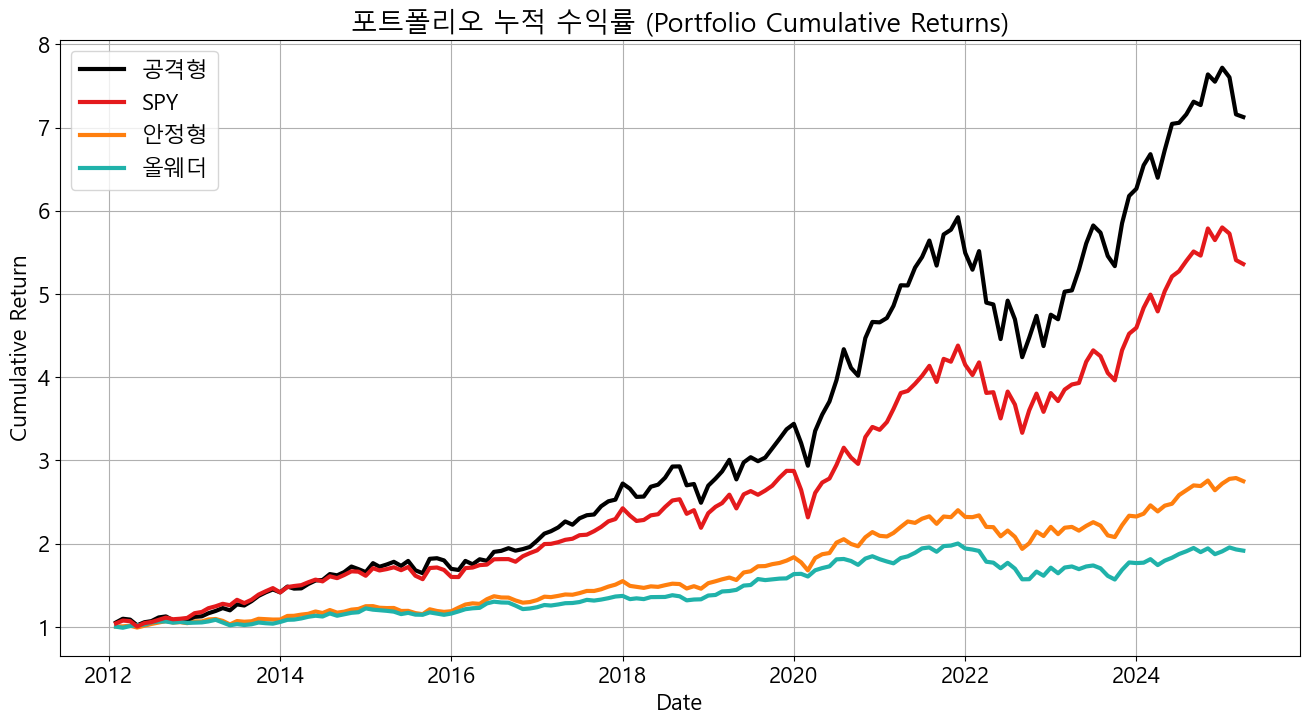

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# [1] pivot_trimmed: ÏõîÎ≥Ñ Ï¢ÖÍ∞Ä Îç∞Ïù¥ÌÑ∞ (ÏïûÏóêÏÑú ÎßåÎì† Í≤É)
# ÏòàÏãú: pivot_trimmed = pd.read_csv('merged_monthly_close.csv', index_col=0, parse_dates=True)

# [2] ÏõîÎ≥Ñ ÏàòÏùµÎ•† Í≥ÑÏÇ∞
monthly_returns = pivot_trimmed.pct_change().dropna()

# [3] Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Î∞±ÌÖåÏä§Ìä∏ Ìï®Ïàò
def backtest_portfolio(weights_dict, monthly_returns):
    tickers = list(weights_dict.keys())
    returns = monthly_returns[tickers]
    
    weights = pd.Series(weights_dict)
    
    # Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ ÏàòÏùµÎ•† Í≥ÑÏÇ∞
    portfolio_return = (returns * weights).sum(axis=1)
    
    # ÎàÑÏ†Å ÏàòÏùµÎ•† Í≥ÑÏÇ∞
    cumulative_return = (1 + portfolio_return).cumprod()
    
    # ÏÑ±Í≥º ÏßÄÌëú Í≥ÑÏÇ∞
    total_return = cumulative_return.iloc[-1] - 1
    n_years = (cumulative_return.index[-1] - cumulative_return.index[0]).days / 365.25
    CAGR = (cumulative_return.iloc[-1]) ** (1 / n_years) - 1
    MDD = ((cumulative_return / cumulative_return.cummax()) - 1).min()
    
    metrics = {
        'Total Return': f'{total_return:.2%}',
        'CAGR': f'{CAGR:.2%}',
        'Max Drawdown': f'{MDD:.2%}'
    }
    
    return cumulative_return, portfolio_return, metrics

# [4] Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ ÌÖåÏä§Ìä∏
portfolios = {
    'ÏïàÏ†ïÌòï': weights_1,
    'Í≥µÍ≤©Ìòï': weights_2,
    'Ïò¨Ïõ®Îçî': weights_3,
    'SPY': weights_4
}

results = {}

# Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Î∞±ÌÖåÏä§Ìä∏ Ïã§Ìñâ
for name, weights in portfolios.items():
    cum_ret, monthly_ret, metrics = backtest_portfolio(weights, monthly_returns)
    results[name] = {
        'Cumulative Return': cum_ret,
        'Monthly Return': monthly_ret,
        'Metrics': metrics
    }
    print(f'\n{name} Metrics:')
    for k, v in metrics.items():
        print(f'  {k}: {v}')

# [5] ETFÎ≥Ñ ÎåÄÌëú ÏÉâÏÉÅ Ï†ïÏùò
colors = {
    'ÏïàÏ†ïÌòï': '#FF7F0E',  # Ï£ºÌô©
    'Í≥µÍ≤©Ìòï': '#000000',  # Í≤ÄÏ†ï
    'Ïò¨Ïõ®Îçî': '#20B2AA', # Ï≤≠Î°ù
    'SPY': '#E41A1C',  # Îπ®Í∞ï
}

plt.rcParams.update({'font.size': 16})

# [6] Í≤∞Í≥º ÏãúÍ∞ÅÌôî (ÏÑ†Ïóê ÌëúÏãúÎêòÎäî ÏÉâÏÉÅ Ï†ÅÏö©)
plt.figure(figsize=(16,8))

lines = {}
# Í∞Å Ìè¨Ìä∏Ìè¥Î¶¨Ïò§Î≥Ñ ÎàÑÏ†Å ÏàòÏùµÎ•† ÏãúÍ∞ÅÌôî
for name, data in results.items():
    line, = plt.plot(data['Cumulative Return'], label=name, color=colors.get(name, '#000000'), linewidth=3)
    lines[name] = line

# ÏõêÌïòÎäî ÏàúÏÑúÎåÄÎ°ú Î≤îÎ°Ä Ï∂úÎ†•
order = ['Í≥µÍ≤©Ìòï', 'SPY', 'ÏïàÏ†ïÌòï', 'Ïò¨Ïõ®Îçî']  # ÏõêÌïòÎäî ÏàúÏÑúÎåÄÎ°ú ÏÑ§Ï†ï
plt.legend([lines[name] for name in order], order)

plt.title('Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ ÎàÑÏ†Å ÏàòÏùµÎ•† (Portfolio Cumulative Returns)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.show()


ÏïàÏ†ïÌòï Metrics:
  Total Return: 175.15%
  CAGR: 7.99%
  Max Drawdown: -19.34%

Ïò¨Ïõ®Îçî Metrics:
  Total Return: 91.67%
  CAGR: 5.07%
  Max Drawdown: -21.60%

SCHD Metrics:
  Total Return: 257.89%
  CAGR: 10.17%
  Max Drawdown: -22.34%

TLT Metrics:
  Total Return: 4.62%
  CAGR: 0.34%
  Max Drawdown: -47.61%

GLD Metrics:
  Total Return: 79.42%
  CAGR: 4.54%
  Max Drawdown: -40.97%


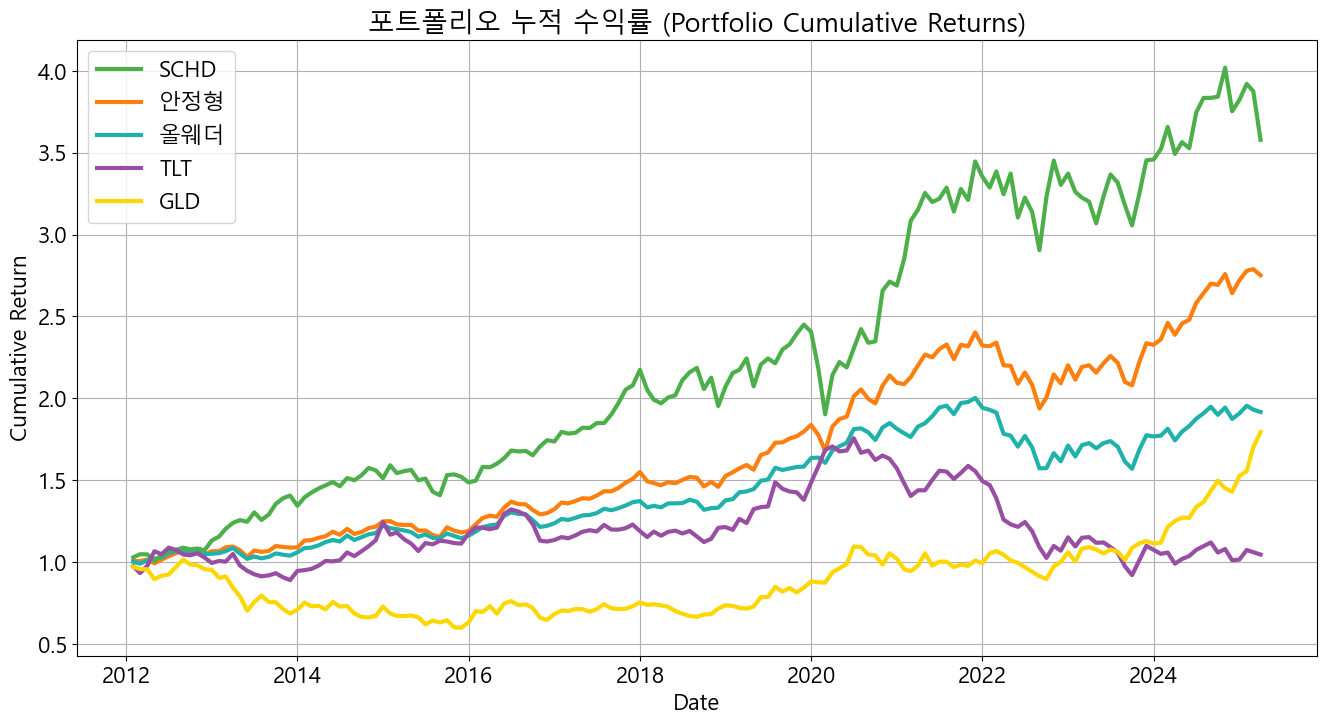

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# [1] pivot_trimmed: ÏõîÎ≥Ñ Ï¢ÖÍ∞Ä Îç∞Ïù¥ÌÑ∞ (ÏïûÏóêÏÑú ÎßåÎì† Í≤É)
# ÏòàÏãú: pivot_trimmed = pd.read_csv('merged_monthly_close.csv', index_col=0, parse_dates=True)

# [2] ÏõîÎ≥Ñ ÏàòÏùµÎ•† Í≥ÑÏÇ∞
monthly_returns = pivot_trimmed.pct_change().dropna()

# [3] Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Î∞±ÌÖåÏä§Ìä∏ Ìï®Ïàò
def backtest_portfolio(weights_dict, monthly_returns):
    tickers = list(weights_dict.keys())
    returns = monthly_returns[tickers]
    
    weights = pd.Series(weights_dict)
    
    # Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ ÏàòÏùµÎ•† Í≥ÑÏÇ∞
    portfolio_return = (returns * weights).sum(axis=1)
    
    # ÎàÑÏ†Å ÏàòÏùµÎ•† Í≥ÑÏÇ∞
    cumulative_return = (1 + portfolio_return).cumprod()
    
    # ÏÑ±Í≥º ÏßÄÌëú Í≥ÑÏÇ∞
    total_return = cumulative_return.iloc[-1] - 1
    n_years = (cumulative_return.index[-1] - cumulative_return.index[0]).days / 365.25
    CAGR = (cumulative_return.iloc[-1]) ** (1 / n_years) - 1
    MDD = ((cumulative_return / cumulative_return.cummax()) - 1).min()
    
    metrics = {
        'Total Return': f'{total_return:.2%}',
        'CAGR': f'{CAGR:.2%}',
        'Max Drawdown': f'{MDD:.2%}'
    }
    
    return cumulative_return, portfolio_return, metrics

# [4] Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ ÌÖåÏä§Ìä∏
portfolios = {
    'ÏïàÏ†ïÌòï': weights_1,
    'Ïò¨Ïõ®Îçî': weights_3,
    'SCHD': {'SCHD':1.0},
    'TLT': {'TLT':1.0},
    'GLD': {'GLD':1.0}
}

results = {}

# Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Î∞±ÌÖåÏä§Ìä∏ Ïã§Ìñâ
for name, weights in portfolios.items():
    cum_ret, monthly_ret, metrics = backtest_portfolio(weights, monthly_returns)
    results[name] = {
        'Cumulative Return': cum_ret,
        'Monthly Return': monthly_ret,
        'Metrics': metrics
    }
    print(f'\n{name} Metrics:')
    for k, v in metrics.items():
        print(f'  {k}: {v}')

# [5] ETFÎ≥Ñ ÎåÄÌëú ÏÉâÏÉÅ Ï†ïÏùò
colors = {
    'ÏïàÏ†ïÌòï': '#FF7F0E',  # Ï£ºÌô©
    'Ïò¨Ïõ®Îçî': '#20B2AA', # Ï≤≠Î°ù
    'TLT': '#984EA3',   # Î≥¥Îùº
    'GLD': '#FFD700',   # Í∏àÏÉâ
    'SCHD': '#4DAF4A',  # Ï¥àÎ°ù
}

plt.rcParams.update({'font.size': 16})

# [6] Í≤∞Í≥º ÏãúÍ∞ÅÌôî (ÏÑ†Ïóê ÌëúÏãúÎêòÎäî ÏÉâÏÉÅ Ï†ÅÏö©)
plt.figure(figsize=(16,8))

lines = {}
# Í∞Å Ìè¨Ìä∏Ìè¥Î¶¨Ïò§Î≥Ñ ÎàÑÏ†Å ÏàòÏùµÎ•† ÏãúÍ∞ÅÌôî
for name, data in results.items():
    line, = plt.plot(data['Cumulative Return'], label=name, color=colors.get(name, '#000000'), linewidth=3)
    lines[name] = line

# ÏõêÌïòÎäî ÏàúÏÑúÎåÄÎ°ú Î≤îÎ°Ä Ï∂úÎ†•
order = ['SCHD', 'ÏïàÏ†ïÌòï', 'Ïò¨Ïõ®Îçî', 'TLT', 'GLD']  # ÏõêÌïòÎäî ÏàúÏÑúÎåÄÎ°ú ÏÑ§Ï†ï
plt.legend([lines[name] for name in order], order)

plt.title('Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ ÎàÑÏ†Å ÏàòÏùµÎ•† (Portfolio Cumulative Returns)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.show()


Í≥µÍ≤©Ìòï Metrics:
  Total Return: 612.61%
  CAGR: 16.09%
  Max Drawdown: -28.39%

Ïò¨Ïõ®Îçî Metrics:
  Total Return: 91.67%
  CAGR: 5.07%
  Max Drawdown: -21.60%

SPY Metrics:
  Total Return: 435.99%
  CAGR: 13.60%
  Max Drawdown: -23.93%

QQQ Metrics:
  Total Return: 784.08%
  CAGR: 18.01%
  Max Drawdown: -32.58%


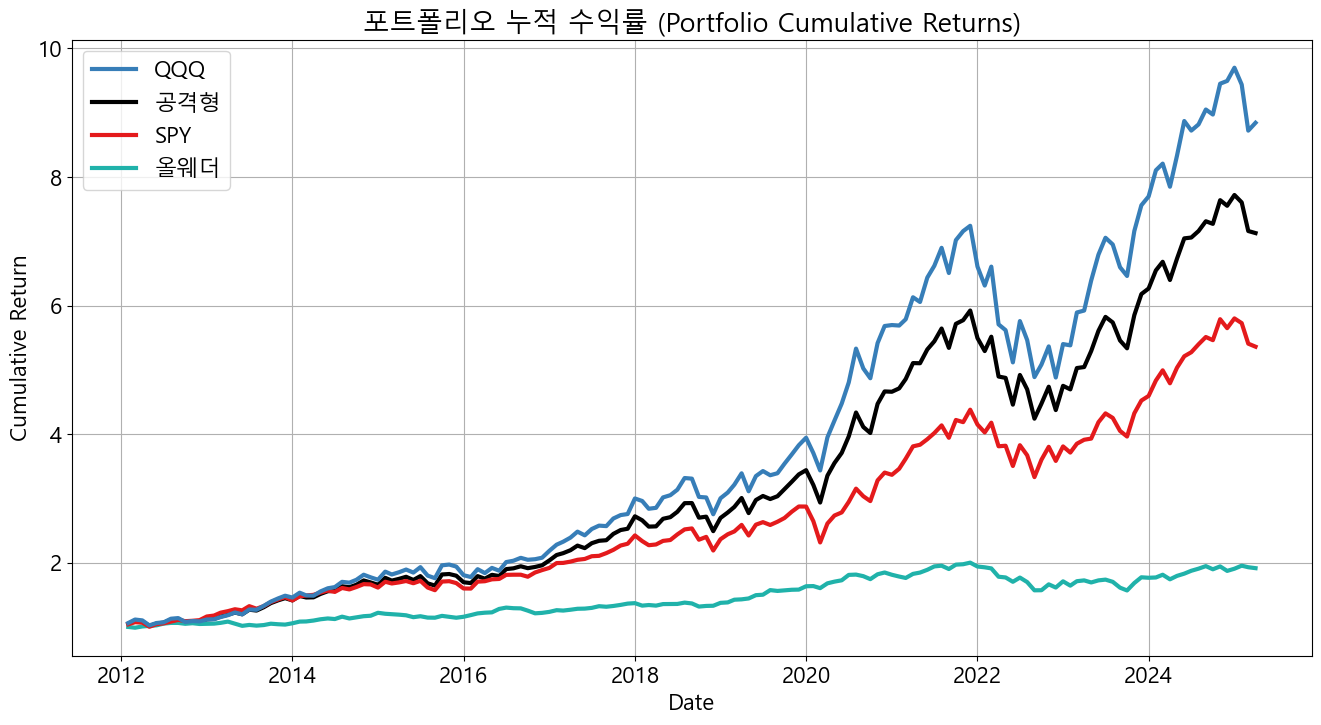

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# [1] pivot_trimmed: ÏõîÎ≥Ñ Ï¢ÖÍ∞Ä Îç∞Ïù¥ÌÑ∞ (ÏïûÏóêÏÑú ÎßåÎì† Í≤É)
# ÏòàÏãú: pivot_trimmed = pd.read_csv('merged_monthly_close.csv', index_col=0, parse_dates=True)

# [2] ÏõîÎ≥Ñ ÏàòÏùµÎ•† Í≥ÑÏÇ∞
monthly_returns = pivot_trimmed.pct_change().dropna()

# [3] Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Î∞±ÌÖåÏä§Ìä∏ Ìï®Ïàò
def backtest_portfolio(weights_dict, monthly_returns):
    tickers = list(weights_dict.keys())
    returns = monthly_returns[tickers]
    
    weights = pd.Series(weights_dict)
    
    # Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ ÏàòÏùµÎ•† Í≥ÑÏÇ∞
    portfolio_return = (returns * weights).sum(axis=1)
    
    # ÎàÑÏ†Å ÏàòÏùµÎ•† Í≥ÑÏÇ∞
    cumulative_return = (1 + portfolio_return).cumprod()
    
    # ÏÑ±Í≥º ÏßÄÌëú Í≥ÑÏÇ∞
    total_return = cumulative_return.iloc[-1] - 1
    n_years = (cumulative_return.index[-1] - cumulative_return.index[0]).days / 365.25
    CAGR = (cumulative_return.iloc[-1]) ** (1 / n_years) - 1
    MDD = ((cumulative_return / cumulative_return.cummax()) - 1).min()
    
    metrics = {
        'Total Return': f'{total_return:.2%}',
        'CAGR': f'{CAGR:.2%}',
        'Max Drawdown': f'{MDD:.2%}'
    }
    
    return cumulative_return, portfolio_return, metrics

# [4] Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ ÌÖåÏä§Ìä∏
portfolios = {
    'Í≥µÍ≤©Ìòï': weights_2,
    'Ïò¨Ïõ®Îçî': weights_3,
    'SPY': weights_4,
    'QQQ': {'QQQ':1.0},
}

results = {}

# Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Î∞±ÌÖåÏä§Ìä∏ Ïã§Ìñâ
for name, weights in portfolios.items():
    cum_ret, monthly_ret, metrics = backtest_portfolio(weights, monthly_returns)
    results[name] = {
        'Cumulative Return': cum_ret,
        'Monthly Return': monthly_ret,
        'Metrics': metrics
    }
    print(f'\n{name} Metrics:')
    for k, v in metrics.items():
        print(f'  {k}: {v}')

# [5] ETFÎ≥Ñ ÎåÄÌëú ÏÉâÏÉÅ Ï†ïÏùò
colors = {
    'Ïò¨Ïõ®Îçî': '#20B2AA', # Ï≤≠Î°ù
    'SPY': '#E41A1C',
    'QQQ': '#377EB8',
    'Í≥µÍ≤©Ìòï': '#000000'   # Í≤ÄÏùÄÏÉâ
}

plt.rcParams.update({'font.size': 16})

# [6] Í≤∞Í≥º ÏãúÍ∞ÅÌôî (ÏÑ†Ïóê ÌëúÏãúÎêòÎäî ÏÉâÏÉÅ Ï†ÅÏö©)
plt.figure(figsize=(16,8))

lines = {}
# Í∞Å Ìè¨Ìä∏Ìè¥Î¶¨Ïò§Î≥Ñ ÎàÑÏ†Å ÏàòÏùµÎ•† ÏãúÍ∞ÅÌôî
for name, data in results.items():
    line, = plt.plot(data['Cumulative Return'], label=name, color=colors.get(name, '#000000'), linewidth=3)
    lines[name] = line

# ÏõêÌïòÎäî ÏàúÏÑúÎåÄÎ°ú Î≤îÎ°Ä Ï∂úÎ†•
order = ['QQQ', 'Í≥µÍ≤©Ìòï', 'SPY', 'Ïò¨Ïõ®Îçî']  # ÏõêÌïòÎäî ÏàúÏÑúÎåÄÎ°ú ÏÑ§Ï†ï
plt.legend([lines[name] for name in order], order)

plt.title('Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ ÎàÑÏ†Å ÏàòÏùµÎ•† (Portfolio Cumulative Returns)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.show()


ÏïàÏ†ïÌòï Metrics:
  Total Return: 175.15%
  CAGR: 7.99%
  Max Drawdown: -19.34%

Ïò¨Ïõ®Îçî Metrics:
  Total Return: 91.67%
  CAGR: 5.07%
  Max Drawdown: -21.60%


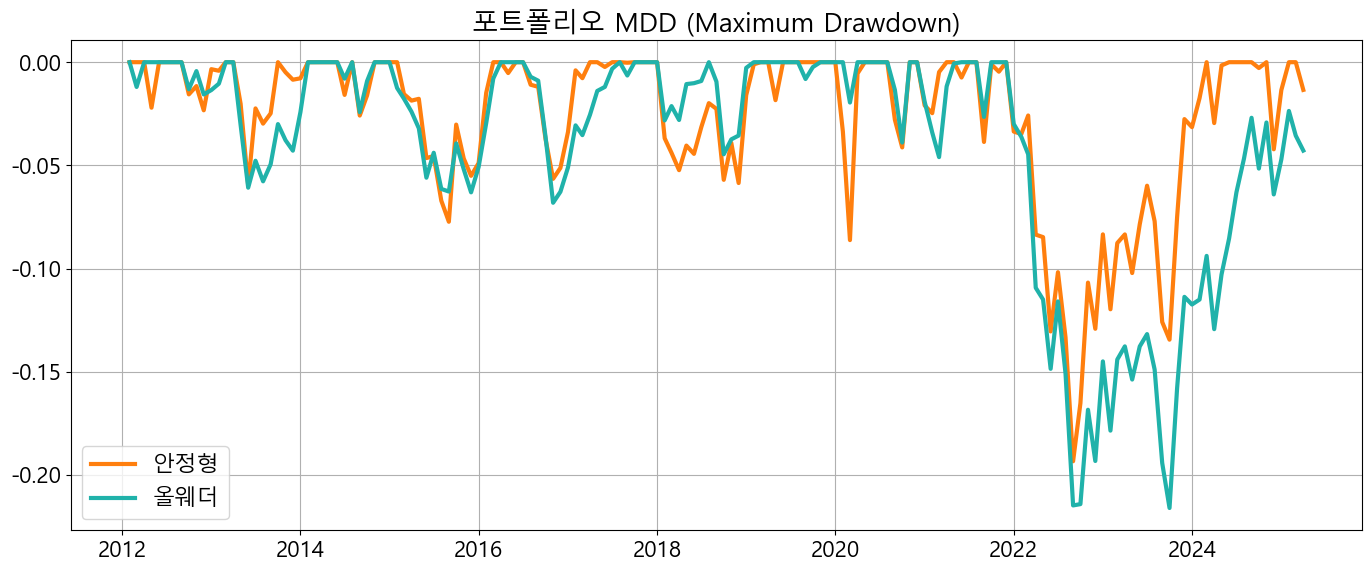

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# [1] pivot_trimmed: ÏõîÎ≥Ñ Ï¢ÖÍ∞Ä Îç∞Ïù¥ÌÑ∞ (ÏïûÏóêÏÑú ÎßåÎì† Í≤É)
# ÏòàÏãú: pivot_trimmed = pd.read_csv('merged_monthly_close.csv', index_col=0, parse_dates=True)

# [2] ÏõîÎ≥Ñ ÏàòÏùµÎ•† Í≥ÑÏÇ∞
monthly_returns = pivot_trimmed.pct_change().dropna()

# [3] Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Î∞±ÌÖåÏä§Ìä∏ Ìï®Ïàò
def backtest_portfolio(weights_dict, monthly_returns):
    tickers = list(weights_dict.keys())
    returns = monthly_returns[tickers]
    
    weights = pd.Series(weights_dict)
    
    # Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ ÏàòÏùµÎ•† Í≥ÑÏÇ∞
    portfolio_return = (returns * weights).sum(axis=1)
    
    # ÎàÑÏ†Å ÏàòÏùµÎ•† Í≥ÑÏÇ∞
    cumulative_return = (1 + portfolio_return).cumprod()
    
    # ÏÑ±Í≥º ÏßÄÌëú Í≥ÑÏÇ∞
    total_return = cumulative_return.iloc[-1] - 1
    n_years = (cumulative_return.index[-1] - cumulative_return.index[0]).days / 365.25
    CAGR = (cumulative_return.iloc[-1]) ** (1 / n_years) - 1
    MDD = ((cumulative_return / cumulative_return.cummax()) - 1).min()
    
    metrics = {
        'Total Return': f'{total_return:.2%}',
        'CAGR': f'{CAGR:.2%}',
        'Max Drawdown': f'{MDD:.2%}'
    }
    
    return cumulative_return, portfolio_return, metrics

# [4] Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ ÌÖåÏä§Ìä∏ (Ïó¨Í∏∞ÏÑúÎäî Ïò¨Ïõ®ÎçîÏôÄ SPY Îì±ÏúºÎ°ú ÏòàÏãú Ï∂îÍ∞Ä)
portfolios = {
    'ÏïàÏ†ïÌòï': weights_1,
    # 'Í≥µÍ≤©Ìòï': weights_2,
    'Ïò¨Ïõ®Îçî': weights_3,
    # 'SPY': weights_4
}

results = {}

# Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Î∞±ÌÖåÏä§Ìä∏ Ïã§Ìñâ
for name, weights in portfolios.items():
    cum_ret, monthly_ret, metrics = backtest_portfolio(weights, monthly_returns)
    results[name] = {
        'Cumulative Return': cum_ret,
        'Monthly Return': monthly_ret,
        'Metrics': metrics
    }
    print(f'\n{name} Metrics:')
    for k, v in metrics.items():
        print(f'  {k}: {v}')

# [5] ETFÎ≥Ñ ÎåÄÌëú ÏÉâÏÉÅ Ï†ïÏùò
colors = {
    'ÏïàÏ†ïÌòï': '#FF7F0E',  # Ï£ºÌô©
    # 'Í≥µÍ≤©Ìòï': '#000000',  # Í≤ÄÏ†ï
    'Ïò¨Ïõ®Îçî': '#20B2AA', # Ï≤≠Î°ù
    # 'SPY': '#E41A1C',  # Îπ®Í∞ï
}

plt.rcParams.update({'font.size': 16})

# [6] MDD Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(14, 6))

# Í∞Å Ìè¨Ìä∏Ìè¥Î¶¨Ïò§Î≥Ñ ÎàÑÏ†Å ÏàòÏùµÎ•† Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî
for name, data in results.items():
    # MDD Í≥ÑÏÇ∞ (ÎàÑÏ†Å ÏàòÏùµÎ•†ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú MDD Í≥ÑÏÇ∞)
    peak = data['Cumulative Return'].cummax()
    drawdown = (data['Cumulative Return'] - peak) / peak
    plt.plot(drawdown.index, drawdown, label=name, color=colors.get(name, '#000000'), linewidth=3)

plt.title('Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ MDD (Maximum Drawdown)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


ÏïàÏ†ïÌòï Metrics:
  Total Return: 175.15%
  CAGR: 7.99%
  Max Drawdown: -19.34%

Ïò¨Ïõ®Îçî Metrics:
  Total Return: 91.67%
  CAGR: 5.07%
  Max Drawdown: -21.60%

SCHD Metrics:
  Total Return: 257.89%
  CAGR: 10.17%
  Max Drawdown: -22.34%


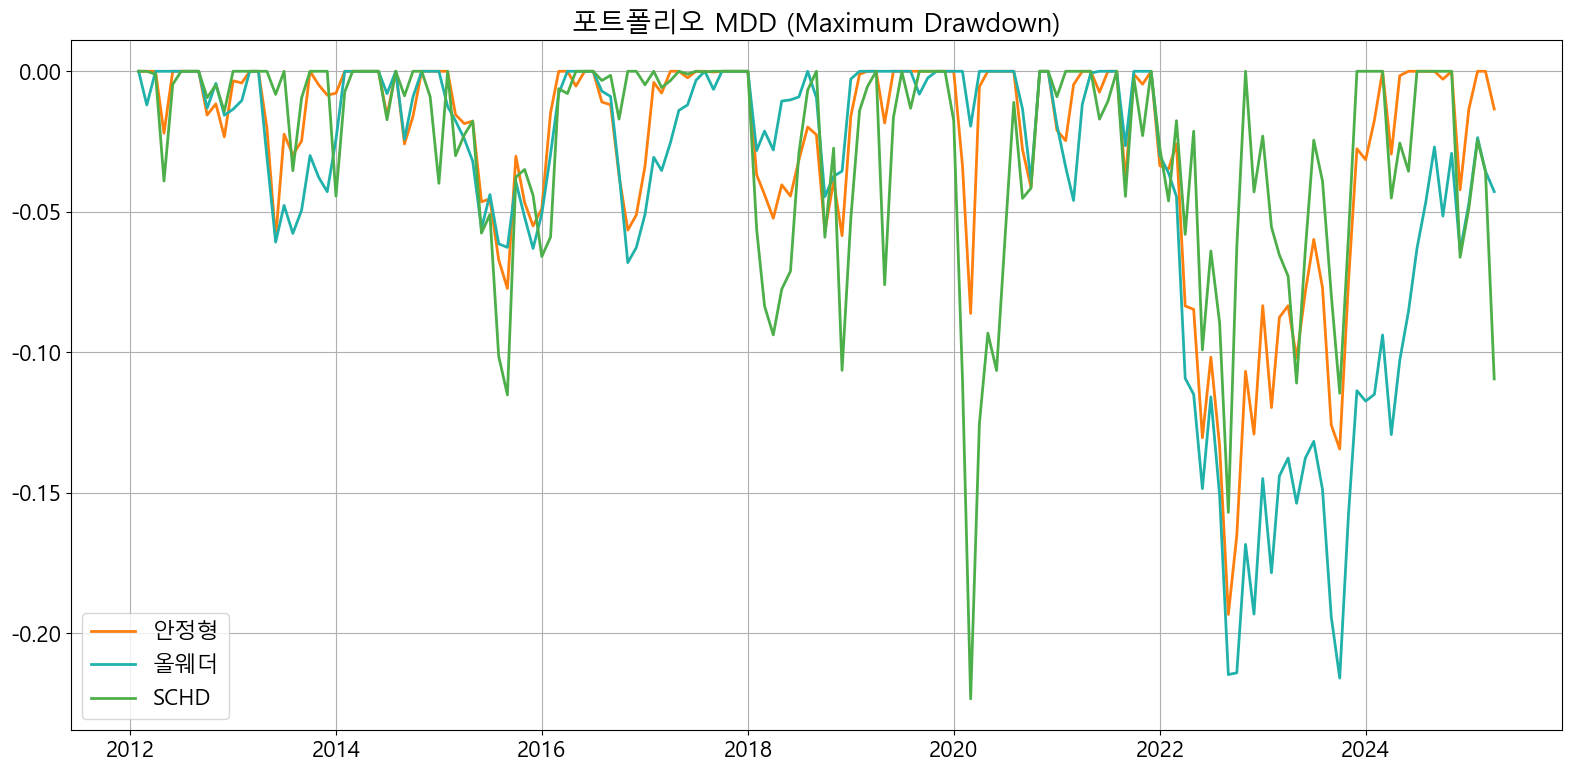

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# [1] pivot_trimmed: ÏõîÎ≥Ñ Ï¢ÖÍ∞Ä Îç∞Ïù¥ÌÑ∞ (ÏïûÏóêÏÑú ÎßåÎì† Í≤É)
# ÏòàÏãú: pivot_trimmed = pd.read_csv('merged_monthly_close.csv', index_col=0, parse_dates=True)

# [2] ÏõîÎ≥Ñ ÏàòÏùµÎ•† Í≥ÑÏÇ∞
monthly_returns = pivot_trimmed.pct_change().dropna()

# [3] Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Î∞±ÌÖåÏä§Ìä∏ Ìï®Ïàò
def backtest_portfolio(weights_dict, monthly_returns):
    tickers = list(weights_dict.keys())
    returns = monthly_returns[tickers]
    
    weights = pd.Series(weights_dict)
    
    # Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ ÏàòÏùµÎ•† Í≥ÑÏÇ∞
    portfolio_return = (returns * weights).sum(axis=1)
    
    # ÎàÑÏ†Å ÏàòÏùµÎ•† Í≥ÑÏÇ∞
    cumulative_return = (1 + portfolio_return).cumprod()
    
    # ÏÑ±Í≥º ÏßÄÌëú Í≥ÑÏÇ∞
    total_return = cumulative_return.iloc[-1] - 1
    n_years = (cumulative_return.index[-1] - cumulative_return.index[0]).days / 365.25
    CAGR = (cumulative_return.iloc[-1]) ** (1 / n_years) - 1
    MDD = ((cumulative_return / cumulative_return.cummax()) - 1).min()
    
    metrics = {
        'Total Return': f'{total_return:.2%}',
        'CAGR': f'{CAGR:.2%}',
        'Max Drawdown': f'{MDD:.2%}'
    }
    
    return cumulative_return, portfolio_return, metrics

# [4] Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ ÌÖåÏä§Ìä∏ (Ïó¨Í∏∞ÏÑúÎäî Ïò¨Ïõ®ÎçîÏôÄ SPY Îì±ÏúºÎ°ú ÏòàÏãú Ï∂îÍ∞Ä)
portfolios = {
    'ÏïàÏ†ïÌòï': weights_1,
    # 'Í≥µÍ≤©Ìòï': weights_2,
    'Ïò¨Ïõ®Îçî': weights_3,
    # 'SPY': weights_4,
    'SCHD': {'SCHD':1.0},
}

results = {}

# Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Î∞±ÌÖåÏä§Ìä∏ Ïã§Ìñâ
for name, weights in portfolios.items():
    cum_ret, monthly_ret, metrics = backtest_portfolio(weights, monthly_returns)
    results[name] = {
        'Cumulative Return': cum_ret,
        'Monthly Return': monthly_ret,
        'Metrics': metrics
    }
    print(f'\n{name} Metrics:')
    for k, v in metrics.items():
        print(f'  {k}: {v}')

# [5] ETFÎ≥Ñ ÎåÄÌëú ÏÉâÏÉÅ Ï†ïÏùò
colors = {
    'ÏïàÏ†ïÌòï': '#FF7F0E',  # Ï£ºÌô©
    # 'Í≥µÍ≤©Ìòï': '#000000',  # Í≤ÄÏ†ï
    'Ïò¨Ïõ®Îçî': '#20B2AA', # Ï≤≠Î°ù
    # 'SPY': '#E41A1C',  # Îπ®Í∞ï
    'SCHD': '#4DAF4A',  # Ï¥àÎ°ù
}

plt.rcParams.update({'font.size': 16})

# [6] MDD Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(16, 8))

# Í∞Å Ìè¨Ìä∏Ìè¥Î¶¨Ïò§Î≥Ñ ÎàÑÏ†Å ÏàòÏùµÎ•† Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî
for name, data in results.items():
    # MDD Í≥ÑÏÇ∞ (ÎàÑÏ†Å ÏàòÏùµÎ•†ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú MDD Í≥ÑÏÇ∞)
    peak = data['Cumulative Return'].cummax()
    drawdown = (data['Cumulative Return'] - peak) / peak
    plt.plot(drawdown.index, drawdown, label=name, color=colors.get(name, '#000000'), linewidth=2)

plt.title('Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ MDD (Maximum Drawdown)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

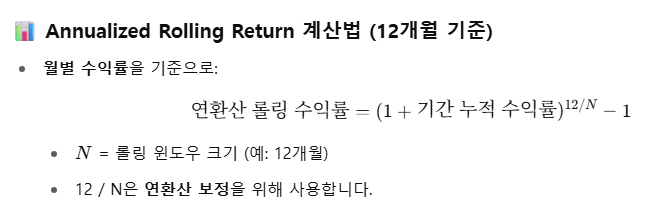

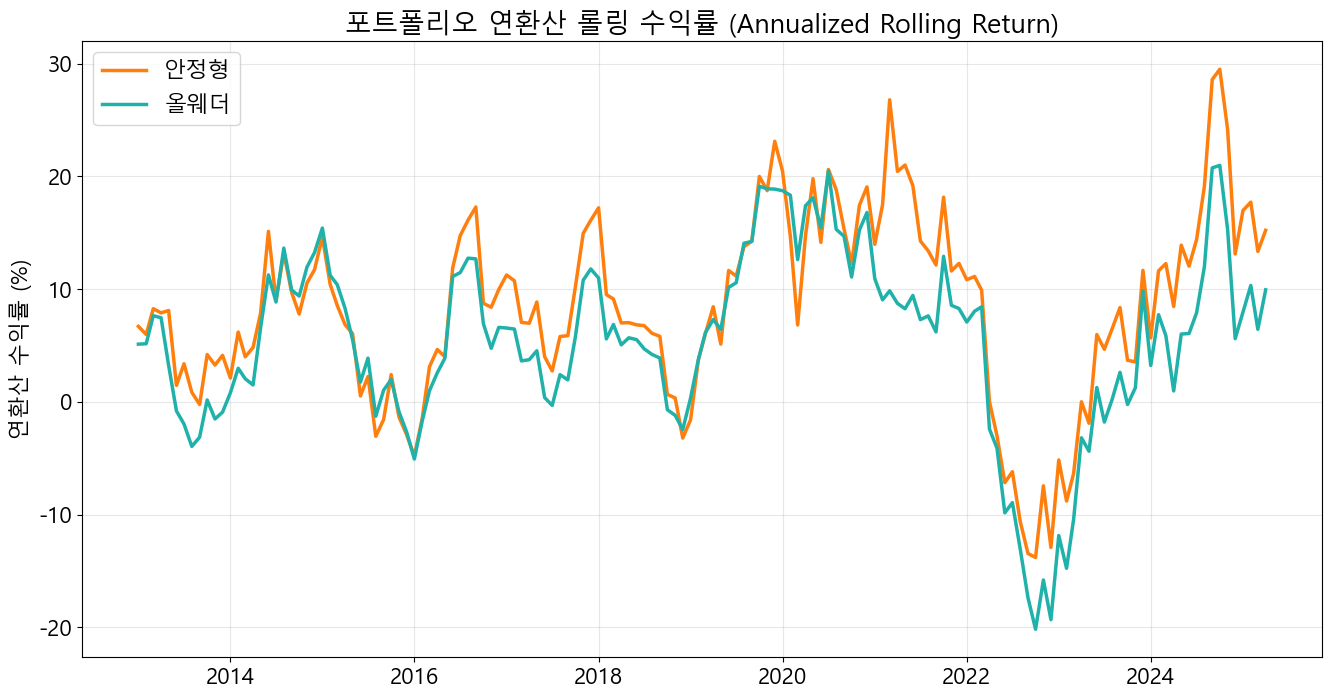

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# [1] pivot_trimmed: ÏõîÎ≥Ñ Ï¢ÖÍ∞Ä Îç∞Ïù¥ÌÑ∞ (Î∂àÎü¨Ïò§Í∏∞)
# ÏòàÏãú: pivot_trimmed = pd.read_csv('merged_monthly_close3.csv', index_col=0, parse_dates=True)

# [2] ÏõîÎ≥Ñ ÏàòÏùµÎ•† Í≥ÑÏÇ∞
monthly_returns = pivot_trimmed.pct_change().dropna()

# [3] Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Î∞±ÌÖåÏä§Ìä∏ Ìï®Ïàò (ÎàÑÏ†ÅÏàòÏùµÎ•† Í¥ÄÎ†® ÏΩîÎìú Ìè¨Ìï®ÎêòÏßÄÎßå, Ïó¨Í∏∞ÏÑ† ÏÇ¨Ïö© X)
def backtest_portfolio(weights_dict, monthly_returns):
    tickers = list(weights_dict.keys())
    returns = monthly_returns[tickers]
    weights = pd.Series(weights_dict)
    portfolio_return = (returns * weights).sum(axis=1)
    return portfolio_return

# [4] Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ ÏÑ§Ï†ï
portfolios = {
    'ÏïàÏ†ïÌòï': weights_1,
    # 'Í≥µÍ≤©Ìòï': weights_2,
    'Ïò¨Ïõ®Îçî': weights_3,
    # 'SPY': weights_4,
}

# [5] ÏÉâÏÉÅ Ï†ïÏùò
colors = {
    'ÏïàÏ†ïÌòï': '#FF7F0E',  # Ï£ºÌô©
    'Í≥µÍ≤©Ìòï': '#000000',  # Í≤ÄÏ†ï
    'Ïò¨Ïõ®Îçî': '#20B2AA', # Ï≤≠Î°ù
    'SPY': '#E41A1C',  # Îπ®Í∞ï
}

# [6] Annualized Rolling Return Í≥ÑÏÇ∞ Î∞è ÏãúÍ∞ÅÌôî
rolling_window = 12  # Í∞úÏõî Í∏∞Ï§Ä

plt.figure(figsize=(16,8))

for name, weights in portfolios.items():
    monthly_ret = backtest_portfolio(weights, monthly_returns)
    
    # ÎàÑÏ†ÅÍ≥±Ïùò 12Í∞úÏõî Î°§ÎßÅ: (1 + r1) * (1 + r2) * ... * (1 + r12)
    rolling_return = (1 + monthly_ret).rolling(window=rolling_window).apply(np.prod, raw=True)
    
    # Ïó∞ÌôòÏÇ∞ Î≥¥Ï†ï: (rolling_return) ** (12/12) - 1 -> ÏùºÎ∞òÏ†ÅÏúºÎ°ú 12Í∞úÏõîÏù¥ÎØÄÎ°ú Í∑∏ÎåÄÎ°ú -1
    annualized_rolling_return = (rolling_return ** (12 / rolling_window) - 1) * 100
    
    plt.plot(annualized_rolling_return, label=name, color=colors.get(name, '#000000'), linewidth=2.5)

plt.legend()
plt.title('Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Ïó∞ÌôòÏÇ∞ Î°§ÎßÅ ÏàòÏùµÎ•† (Annualized Rolling Return)')
plt.ylabel('Ïó∞ÌôòÏÇ∞ ÏàòÏùµÎ•† (%)')
plt.grid(True, alpha=0.3)
plt.show()

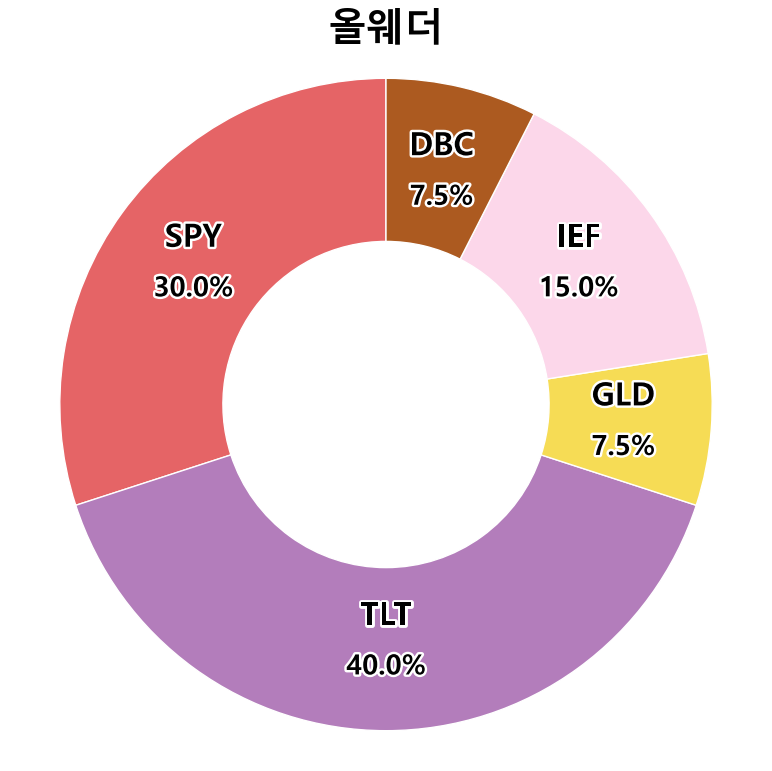

In [19]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import numpy as np
import colorsys

# Í∏∞Ï°¥ ÏÉâÏÉÅ Ï†ïÏùò (Ïò¨Ïõ®ÎçîÎäî Ï≤≠Î°ùÏÉâ)
colors = {
    'SPY': '#E41A1C',     # Îπ®Í∞ï
    'QQQ': '#377EB8',     # ÌååÎûë
    'GLD': '#FFD700',     # ÎÖ∏Îûë
    'SCHD': '#4DAF4A',    # Ï¥àÎ°ù
    'TLT': '#984EA3',     # Î≥¥Îùº
    'ÏïàÏ†ïÌòï': '#FF7F0E',   # Ï£ºÌô©
    'Í≥µÍ≤©Ìòï': '#000000',   # Í≤ÄÏ†ï
    'Ïò¨Ïõ®Îçî': '#20B2AA',   # Ï≤≠Î°ù
    'IEF': '#FF69B4',     # ÌïëÌÅ¨
    'DBC': '#8B4513'      # Í∞àÏÉâ
}

# ÏÉâÏÉÅ Î≥ÄÍ≤Ω Ìï®Ïàò (pastel)
def pastel_color(hex_color, desat_factor=0.9, light_factor=1.3):
    hex_color = hex_color.lstrip('#')
    r, g, b = tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))
    r, g, b = r/255, g/255, b/255
    h, l, s = colorsys.rgb_to_hls(r, g, b)
    
    s *= desat_factor
    l = min(l * light_factor, 1.0)
    
    r, g, b = colorsys.hls_to_rgb(h, l, s)
    return '#{:02x}{:02x}{:02x}'.format(int(r*255), int(g*255), int(b*255))

# ÏÉâÏÉÅ Î™©Î°ùÏùÑ pastelÎ°ú Î≥ÄÌôò
colors_pastel = {k: pastel_color(v) for k, v in colors.items()}

# 'Ïò¨Ïõ®Îçî' Ìè¨Ìä∏Ìè¥Î¶¨Ïò§Îßå ÌÖåÏä§Ìä∏
weights_allweather = {'SPY': 0.25, 'QQQ': 0.25, 'TLT': 0.25, 'GLD': 0.25}  # ÏòàÏãú ÎπÑÏ§ë
portfolios = {
    'Ïò¨Ïõ®Îçî': weights_allweather
}

# Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ ÎπÑÏ§ëÏùÑ ÎÇòÌÉÄÎÇ¥Îäî ÌååÏù¥ Ï∞®Ìä∏ Í∑∏Î¶¨Í∏∞ (ÎπÑÏ§ë 0Ïù∏ ÏûêÏÇ∞ÏùÄ Ï†úÏô∏)
def plot_asset_allocation(weights_dict, title):
    labels = [k for k, v in weights_dict.items() if v > 0]  # ÎπÑÏ§ë 0Ïù∏ ÏûêÏÇ∞ Ï†úÏô∏
    sizes = [v for v in weights_dict.values() if v > 0]      # ÎπÑÏ§ë 0Ïù∏ ÏûêÏÇ∞ Ï†úÏô∏
    assigned_colors = [colors_pastel.get(label, '#cccccc') for label in labels]

    plt.figure(figsize=(8, 8))

    wedges, _ = plt.pie(
        sizes,
        labels=None,
        colors=assigned_colors,
        startangle=90,
        wedgeprops=dict(width=0.5, edgecolor='white')
    )

    for i, wedge in enumerate(wedges):
        ang = (wedge.theta2 + wedge.theta1) / 2.
        r_text = 0.73
        x_text = r_text * np.cos(np.deg2rad(ang))
        y_text = r_text * np.sin(np.deg2rad(ang))
        
        label = labels[i]
        pct_text = f"{sizes[i]*100:.1f}%"

        plt.text(
            x_text, y_text + 0.03, label,
            ha='center', va='bottom',
            fontsize=23, weight='semibold', color='black',
            path_effects=[path_effects.withStroke(linewidth=3.5, foreground="white")]
        )
        plt.text(
            x_text, y_text - 0.03, pct_text,
            ha='center', va='top',
            fontsize=20, weight='bold', color='black',
            path_effects=[path_effects.withStroke(linewidth=3.5, foreground="white")]
        )

    plt.title(title, fontsize=28, weight='semibold', pad=3)
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

# Ïò¨Ïõ®Îçî Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ ÎπÑÏ§ë Ï∞®Ìä∏ Í∑∏Î¶¨Í∏∞
plot_asset_allocation(weights_3, 'Ïò¨Ïõ®Îçî')

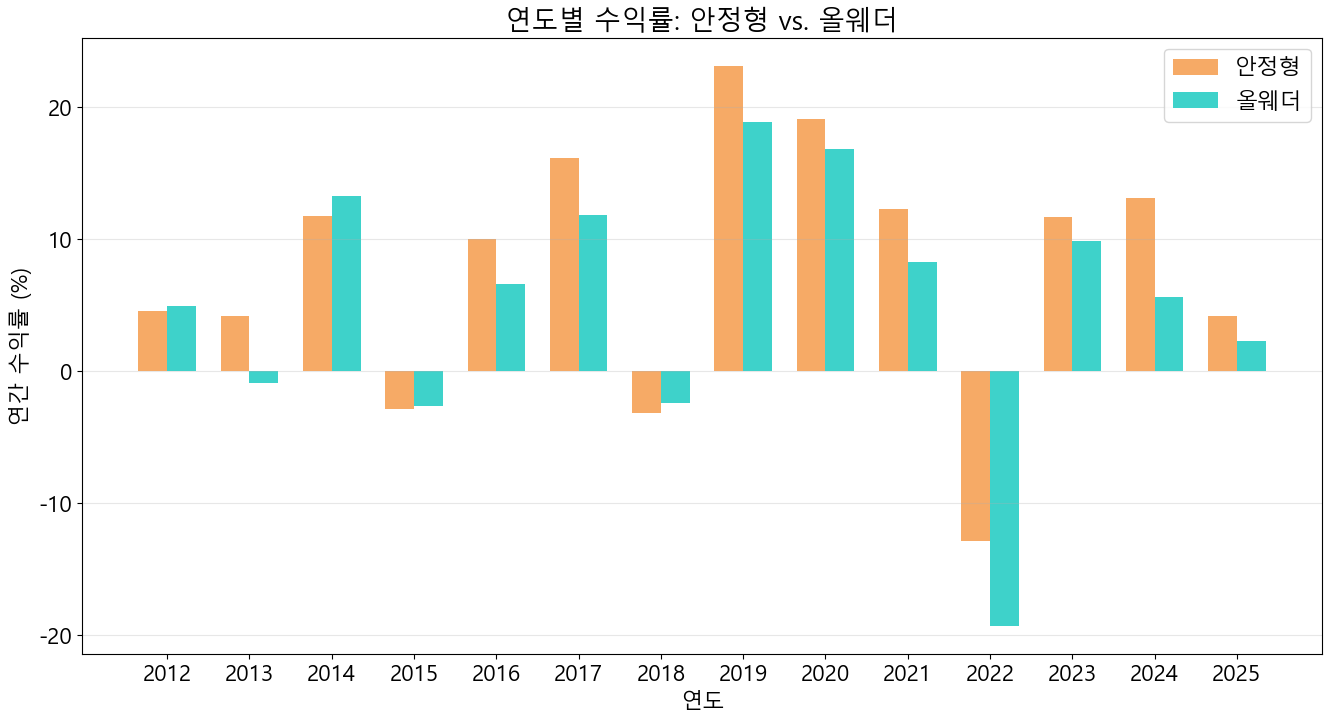

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import colorsys

# pastel_color Ìï®Ïàò Ï†ïÏùò
def pastel_color(hex_color, desat_factor=0.9, light_factor=1.3):
    hex_color = hex_color.lstrip('#')
    r, g, b = tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))
    r, g, b = r/255, g/255, b/255
    h, l, s = colorsys.rgb_to_hls(r, g, b)
    
    s *= desat_factor
    l = min(l * light_factor, 1.0)
    
    r, g, b = colorsys.hls_to_rgb(h, l, s)
    return '#{:02x}{:02x}{:02x}'.format(int(r*255), int(g*255), int(b*255))

# [1] pivot_trimmed: ÏõîÎ≥Ñ Ï¢ÖÍ∞Ä Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ ÏòàÏãú
# pivot_trimmed = pd.read_csv('merged_monthly_close3.csv', index_col=0, parse_dates=True)

# [2] ÏõîÎ≥Ñ ÏàòÏùµÎ•† Í≥ÑÏÇ∞
monthly_returns = pivot_trimmed.pct_change().dropna()

# [3] Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Î∞±ÌÖåÏä§Ìä∏ Ìï®Ïàò
def backtest_portfolio(weights_dict, monthly_returns):
    tickers = list(weights_dict.keys())
    returns = monthly_returns[tickers]
    weights = pd.Series(weights_dict)
    portfolio_return = (returns * weights).sum(axis=1)
    return portfolio_return

# [4] Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ ÏÑ§Ï†ï
portfolios = {
    'ÏïàÏ†ïÌòï': weights_1,
    'Ïò¨Ïõ®Îçî': weights_3,
}

# [5] ÏõêÎûò ÏÉâÏÉÅ Ï†ïÏùò
colors = {
    'ÏïàÏ†ïÌòï': '#FF7F0E',  # Ï£ºÌô©
    'Ïò¨Ïõ®Îçî': '#20B2AA', # Ï≤≠Î°ù
}

# [6] pastel_colorÎ°ú Î∂ÄÎìúÎü¨Ïö¥ ÏÉâÏÉÅÏúºÎ°ú Î≥ÄÌôò
pastel_colors = {k: pastel_color(v) for k, v in colors.items()}

# [7] Ïó∞ÎèÑÎ≥Ñ ÏàòÏùµÎ•† Í≥ÑÏÇ∞ Ìï®Ïàò
def yearly_return(monthly_ret):
    yearly_ret = (1 + monthly_ret).groupby(monthly_ret.index.year).prod() - 1
    return yearly_ret * 100

# [8] Ïó∞ÎèÑÎ≥Ñ ÏàòÏùµÎ•† Í≥ÑÏÇ∞
yearly_returns = {}
for name, weights in portfolios.items():
    monthly_ret = backtest_portfolio(weights, monthly_returns)
    yearly_returns[name] = yearly_return(monthly_ret)

years = yearly_returns['ÏïàÏ†ïÌòï'].index.intersection(yearly_returns['Ïò¨Ïõ®Îçî'].index)

# [9] ÎßâÎåÄÍ∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
bar_width = 0.35
x = np.arange(len(years))

fig, ax = plt.subplots(figsize=(16, 8))

ax.bar(x - bar_width/2, yearly_returns['ÏïàÏ†ïÌòï'].loc[years], width=bar_width, label='ÏïàÏ†ïÌòï', color=pastel_colors['ÏïàÏ†ïÌòï'])
ax.bar(x + bar_width/2, yearly_returns['Ïò¨Ïõ®Îçî'].loc[years], width=bar_width, label='Ïò¨Ïõ®Îçî', color=pastel_colors['Ïò¨Ïõ®Îçî'])

ax.set_xlabel('Ïó∞ÎèÑ')
ax.set_ylabel('Ïó∞Í∞Ñ ÏàòÏùµÎ•† (%)')
ax.set_title('Ïó∞ÎèÑÎ≥Ñ ÏàòÏùµÎ•†: ÏïàÏ†ïÌòï vs. Ïò¨Ïõ®Îçî')
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.legend()
ax.grid(True, axis='y', alpha=0.3)

plt.show()

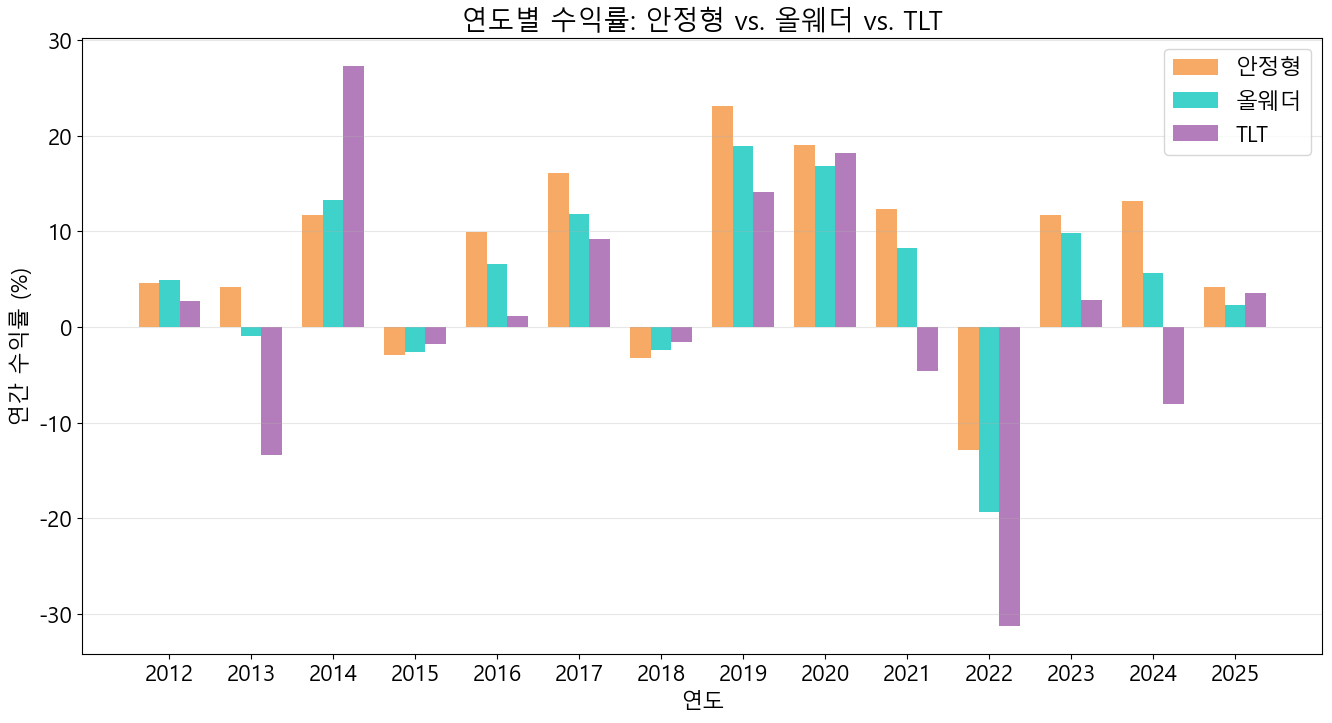

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import colorsys

# pastel_color Ìï®Ïàò Ï†ïÏùò
def pastel_color(hex_color, desat_factor=0.9, light_factor=1.3):
    hex_color = hex_color.lstrip('#')
    r, g, b = tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))
    r, g, b = r/255, g/255, b/255
    h, l, s = colorsys.rgb_to_hls(r, g, b)
    
    s *= desat_factor
    l = min(l * light_factor, 1.0)
    
    r, g, b = colorsys.hls_to_rgb(h, l, s)
    return '#{:02x}{:02x}{:02x}'.format(int(r*255), int(g*255), int(b*255))

# [1] ÏõîÎ≥Ñ ÏàòÏùµÎ•† Í≥ÑÏÇ∞ (pivot_trimmed Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÇ¨Ïö©)
monthly_returns = pivot_trimmed.pct_change().dropna()

# [2] Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Î∞±ÌÖåÏä§Ìä∏ Ìï®Ïàò
def backtest_portfolio(weights_dict, monthly_returns):
    tickers = list(weights_dict.keys())
    returns = monthly_returns[tickers]
    weights = pd.Series(weights_dict)
    portfolio_return = (returns * weights).sum(axis=1)
    return portfolio_return

# [3] Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ ÏÑ§Ï†ï
portfolios = {
    'ÏïàÏ†ïÌòï': weights_1,
    'Ïò¨Ïõ®Îçî': weights_3,
    'TLT': {'TLT': 1.0},
}

# [4] ÏõêÎûò ÏÉâÏÉÅ Ï†ïÏùò
colors = {
    'ÏïàÏ†ïÌòï': '#FF7F0E',  # Ï£ºÌô©
    'Ïò¨Ïõ®Îçî': '#20B2AA',  # Ï≤≠Î°ù
    'TLT': '#984EA3',     # Î≥¥Îùº
}

# [5] pastel_colorÎ°ú Î∂ÄÎìúÎü¨Ïö¥ ÏÉâÏÉÅÏúºÎ°ú Î≥ÄÌôò
pastel_colors = {k: pastel_color(v) for k, v in colors.items()}

# [6] Ïó∞ÎèÑÎ≥Ñ ÏàòÏùµÎ•† Í≥ÑÏÇ∞ Ìï®Ïàò
def yearly_return(monthly_ret):
    yearly_ret = (1 + monthly_ret).groupby(monthly_ret.index.year).prod() - 1
    return yearly_ret * 100

# [7] Ïó∞ÎèÑÎ≥Ñ ÏàòÏùµÎ•† Í≥ÑÏÇ∞
yearly_returns = {}
for name, weights in portfolios.items():
    monthly_ret = backtest_portfolio(weights, monthly_returns)
    yearly_returns[name] = yearly_return(monthly_ret)

# [8] Í≥µÌÜµÎêú Ïó∞ÎèÑ Ïù∏Îç±Ïä§
years = yearly_returns['ÏïàÏ†ïÌòï'].index.intersection(yearly_returns['Ïò¨Ïõ®Îçî'].index).intersection(yearly_returns['TLT'].index)

# [9] ÎßâÎåÄÍ∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
bar_width = 0.25  # Í∞Å ÎßâÎåÄÏùò ÎÑàÎπÑÎ•º Ï°∞Í∏à Ï¢ÅÌòÄÏÑú 3Í∞úÏùò Ìè¨Ìä∏Ìè¥Î¶¨Ïò§Í∞Ä Í≤πÏπòÏßÄ ÏïäÎèÑÎ°ù Ï°∞Ï†ï
x = np.arange(len(years))

fig, ax = plt.subplots(figsize=(16, 8))

# Í∞Å Ìè¨Ìä∏Ìè¥Î¶¨Ïò§Ïùò ÎßâÎåÄ Ï∂îÍ∞Ä
ax.bar(x - bar_width, yearly_returns['ÏïàÏ†ïÌòï'].loc[years], width=bar_width, label='ÏïàÏ†ïÌòï', color=pastel_colors['ÏïàÏ†ïÌòï'])
ax.bar(x, yearly_returns['Ïò¨Ïõ®Îçî'].loc[years], width=bar_width, label='Ïò¨Ïõ®Îçî', color=pastel_colors['Ïò¨Ïõ®Îçî'])
ax.bar(x + bar_width, yearly_returns['TLT'].loc[years], width=bar_width, label='TLT', color=pastel_colors['TLT'])

# Í∑∏ÎûòÌîÑ Î†àÏù¥Î∏îÍ≥º Ï†úÎ™© ÏÑ§Ï†ï
ax.set_xlabel('Ïó∞ÎèÑ')
ax.set_ylabel('Ïó∞Í∞Ñ ÏàòÏùµÎ•† (%)')
ax.set_title('Ïó∞ÎèÑÎ≥Ñ ÏàòÏùµÎ•†: ÏïàÏ†ïÌòï vs. Ïò¨Ïõ®Îçî vs. TLT')
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.legend()
ax.grid(True, axis='y', alpha=0.3)

# Í∑∏ÎûòÌîÑ Ï∂úÎ†•
plt.show()

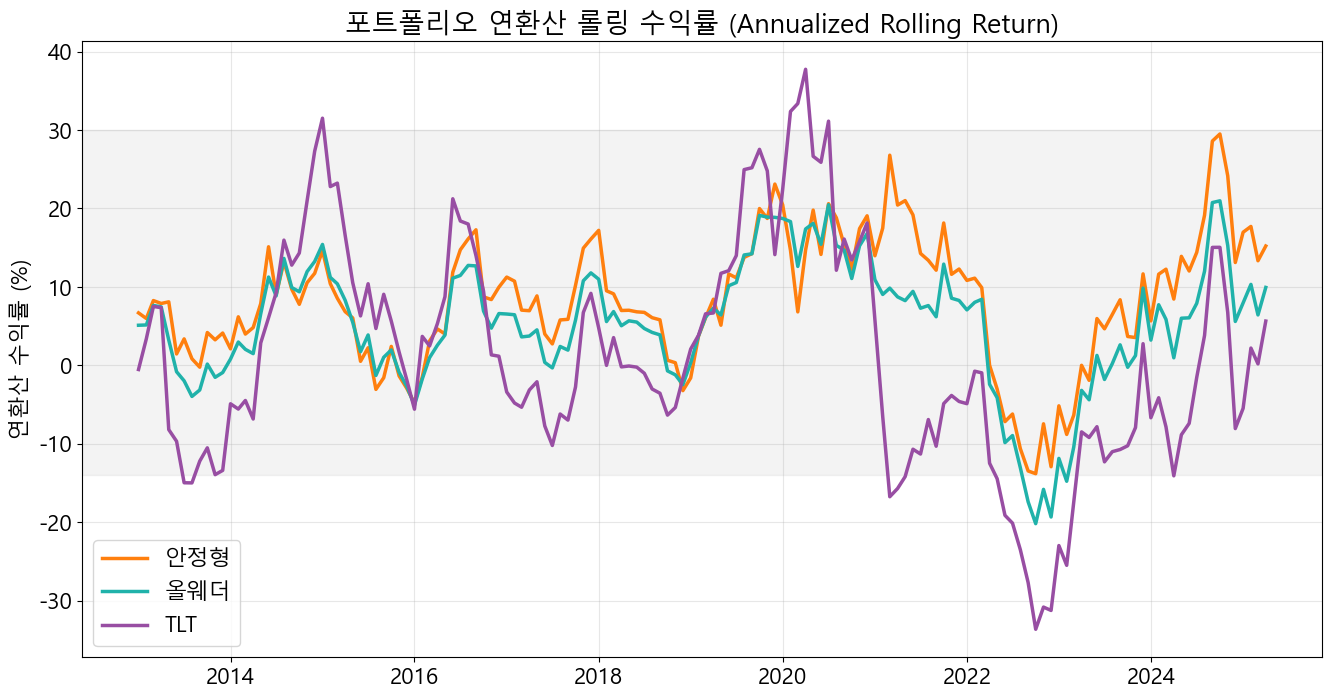

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# [1] pivot_trimmed: ÏõîÎ≥Ñ Ï¢ÖÍ∞Ä Îç∞Ïù¥ÌÑ∞ (Î∂àÎü¨Ïò§Í∏∞)
# ÏòàÏãú: pivot_trimmed = pd.read_csv('merged_monthly_close.csv', index_col=0, parse_dates=True)

# [2] ÏõîÎ≥Ñ ÏàòÏùµÎ•† Í≥ÑÏÇ∞
monthly_returns = pivot_trimmed.pct_change().dropna()

# [3] Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Î∞±ÌÖåÏä§Ìä∏ Ìï®Ïàò (ÎàÑÏ†ÅÏàòÏùµÎ•† Í¥ÄÎ†® ÏΩîÎìú Ìè¨Ìï®ÎêòÏßÄÎßå, Ïó¨Í∏∞ÏÑ† ÏÇ¨Ïö© X)
def backtest_portfolio(weights_dict, monthly_returns):
    tickers = list(weights_dict.keys())
    returns = monthly_returns[tickers]
    weights = pd.Series(weights_dict)
    portfolio_return = (returns * weights).sum(axis=1)
    return portfolio_return

# [4] Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ ÏÑ§Ï†ï
portfolios = {
    'ÏïàÏ†ïÌòï': weights_1,
    'Ïò¨Ïõ®Îçî': weights_3,
    'TLT': {'TLT': 1.0},
}

# [5] ÏÉâÏÉÅ Ï†ïÏùò
colors = {
    'ÏïàÏ†ïÌòï': '#FF7F0E',  # Ï£ºÌô©
    'Ïò¨Ïõ®Îçî': '#20B2AA',  # Ï≤≠Î°ù
    'TLT': '#984EA3',     # Î≥¥Îùº
}

# [6] Annualized Rolling Return Í≥ÑÏÇ∞ Î∞è ÏãúÍ∞ÅÌôî
rolling_window = 12  # Í∞úÏõî Í∏∞Ï§Ä

plt.figure(figsize=(16,8))

for name, weights in portfolios.items():
    monthly_ret = backtest_portfolio(weights, monthly_returns)
    
    # ÎàÑÏ†ÅÍ≥±Ïùò 12Í∞úÏõî Î°§ÎßÅ: (1 + r1) * (1 + r2) * ... * (1 + r12)
    rolling_return = (1 + monthly_ret).rolling(window=rolling_window).apply(np.prod, raw=True)
    
    # Ïó∞ÌôòÏÇ∞ Î≥¥Ï†ï: (rolling_return) ** (12/12) - 1 -> ÏùºÎ∞òÏ†ÅÏúºÎ°ú 12Í∞úÏõîÏù¥ÎØÄÎ°ú Í∑∏ÎåÄÎ°ú -1
    annualized_rolling_return = (rolling_return ** (12 / rolling_window) - 1) * 100
    
    plt.plot(annualized_rolling_return, label=name, color=colors.get(name, '#000000'), linewidth=2.5)

plt.legend()
plt.title('Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Ïó∞ÌôòÏÇ∞ Î°§ÎßÅ ÏàòÏùµÎ•† (Annualized Rolling Return)')
plt.ylabel('Ïó∞ÌôòÏÇ∞ ÏàòÏùµÎ•† (%)')

# yÏ∂ï -14%Î∂ÄÌÑ∞ 30%ÍπåÏßÄ ÌöåÏÉâ ÏùåÏòÅ Ï∂îÍ∞Ä (alpha=0.2Î°ú Ìà¨Î™ÖÎèÑ Ï°∞Ï†à)
plt.axhspan(-14, 30, color='gray', alpha=0.09)

plt.grid(True, alpha=0.3)
plt.show()

In [23]:
import pandas as pd
import numpy as np


# Ìè¨Ìä∏Ìè¥Î¶¨Ïò§Î≥Ñ Í∞ÄÏ§ëÏπò
weights_1 = {'SPY': 0.2501, 'TLT': 0.2167, 'GLD': 0.2485, 'SCHD': 0.2847}  # ÏïàÏ†ïÌòï
weights_2 = {'SPY': 0.05, 'QQQ': 0.73, 'GLD': 0.02, 'SCHD': 0.2}          # Í≥µÍ≤©Ìòï
weights_3 = {'SPY': 0.3, 'TLT': 0.4, 'GLD': 0.075, 'IEF': 0.15, 'DBC': 0.075} # Ïò¨Ïõ®Îçî


def backtest_portfolio(weights_dict, monthly_returns):
    tickers = list(weights_dict.keys())
    total_weight = sum(weights_dict.values())
    if not np.isclose(total_weight, 1):
        print(f"Warning: Í∞ÄÏ§ëÏπò Ìï©Ïù¥ 1Ïù¥ ÏïÑÎãôÎãàÎã§. Ìï©Í≥Ñ={total_weight:.4f}")

    returns = monthly_returns[tickers]
    weights = pd.Series(weights_dict)

    # ÏõîÎ≥Ñ Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ ÏàòÏùµÎ•† Í≥ÑÏÇ∞
    portfolio_return = (returns * weights).sum(axis=1)
    cumulative_return = (1 + portfolio_return).cumprod()

    n_months = len(portfolio_return)
    n_years = n_months / 12

    total_return = cumulative_return.iloc[-1] - 1
    CAGR = cumulative_return.iloc[-1] ** (1 / n_years) - 1

    rolling_max = cumulative_return.cummax()
    drawdowns = (cumulative_return - rolling_max) / rolling_max
    MDD = drawdowns.min()

    mean_ret = portfolio_return.mean()
    std_ret = portfolio_return.std()
    sharpe = np.nan
    if std_ret != 0:
        sharpe = (mean_ret / std_ret) * np.sqrt(12)

    # ---- Ï∂îÍ∞Ä: ÏàòÏùµ Í∏∞Ïó¨ÎèÑ Í≥ÑÏÇ∞ ----
    # Í∞Å Ï¢ÖÎ™© ÏõîÎ≥Ñ ÏàòÏùµÎ•†Ïóê Í∞ÄÏ§ëÏπò Í≥±Ìïú ÌèâÍ∑† (Í∏∞Ïó¨ÎèÑ)
    ret_contrib = (returns * weights).mean() / mean_ret if mean_ret != 0 else np.nan

    # ---- Ï∂îÍ∞Ä: ÏúÑÌóò Í∏∞Ïó¨ÎèÑ Í≥ÑÏÇ∞ ----
    cov_matrix = returns.cov()
    portfolio_var = weights.T @ cov_matrix @ weights
    portfolio_std = np.sqrt(portfolio_var)

    # Í∞Å Ï¢ÖÎ™©Í≥º Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Í≥µÎ∂ÑÏÇ∞ Î≤°ÌÑ∞
    cov_with_portfolio = cov_matrix.dot(weights)
    risk_contrib = (weights * cov_with_portfolio) / portfolio_std / std_ret if std_ret != 0 else np.nan

    # risk_contrib Ï¥ùÌï©ÏùÄ 1Ïù¥ ÎêòÏñ¥Ïïº Ìï® (ÎπÑÏú®)
    risk_contrib = risk_contrib / risk_contrib.sum()

    metrics = {
        'Total Return': total_return,
        'CAGR': CAGR,
        'Max Drawdown': MDD,
        'Sharpe Ratio': sharpe,
        'Return Contribution': ret_contrib,
        'Risk Contribution': risk_contrib
    }

    return cumulative_return, portfolio_return, metrics


# ÏõîÎ≥Ñ ÏàòÏùµÎ•† Í≥ÑÏÇ∞ (pivot_trimmedÎäî Date x TickerÏùò ÏõîÎ≥Ñ Ï¢ÖÍ∞Ä DataFrame)
monthly_returns = pivot_trimmed.pct_change().dropna()

portfolios = {
    'ÏïàÏ†ïÌòï': weights_1,
    'Í≥µÍ≤©Ìòï': weights_2,
    'Ïò¨Ïõ®Îçî': weights_3,
}

results = {}

for name, weights in portfolios.items():
    cum_ret, monthly_ret, metrics = backtest_portfolio(weights, monthly_returns)
    results[name] = {
        'Cumulative Return': cum_ret,
        'Monthly Return': monthly_ret,
        'Metrics': metrics
    }

def print_portfolio_summary(name, weights, metrics):
    print(f"=== {name} Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ ÏöîÏïΩ ===")
    print("Íµ¨ÏÑ± Ï¢ÖÎ™© Î∞è ÎπÑÏ§ë:")
    for ticker, weight in weights.items():
        print(f"  {ticker}: {weight*100:.2f}%")
    print("\nÏ£ºÏöî ÏÑ±Í≥º ÏßÄÌëú:")
    print(f"  Ï¥ù ÏàòÏùµÎ•†: {metrics['Total Return']*100:.2f}%")
    print(f"  Ïó∞ÌèâÍ∑† ÏÑ±Ïû•Î•† (CAGR): {metrics['CAGR']*100:.2f}%")
    print(f"  ÏµúÎåÄ ÎÇôÌè≠ (MDD): {metrics['Max Drawdown']*100:.2f}%")
    print(f"  ÏÉ§ÌîÑ ÎπÑÏú®: {metrics['Sharpe Ratio']:.3f}")
    print("\nÏàòÏùµ Í∏∞Ïó¨ÎèÑ (Return Contribution):")
    for ticker, val in metrics['Return Contribution'].items():
        print(f"  {ticker}: {val*100:.2f}%")
    print("\nÏúÑÌóò Í∏∞Ïó¨ÎèÑ (Risk Contribution):")
    for ticker, val in metrics['Risk Contribution'].items():
        print(f"  {ticker}: {val*100:.2f}%")
    print("\n")

for name in portfolios.keys():
    print_portfolio_summary(name, portfolios[name], results[name]['Metrics'])

=== ÏïàÏ†ïÌòï Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ ÏöîÏïΩ ===
Íµ¨ÏÑ± Ï¢ÖÎ™© Î∞è ÎπÑÏ§ë:
  SPY: 25.01%
  TLT: 21.67%
  GLD: 24.85%
  SCHD: 28.47%

Ï£ºÏöî ÏÑ±Í≥º ÏßÄÌëú:
  Ï¥ù ÏàòÏùµÎ•†: 175.15%
  Ïó∞ÌèâÍ∑† ÏÑ±Ïû•Î•† (CAGR): 7.94%
  ÏµúÎåÄ ÎÇôÌè≠ (MDD): -19.34%
  ÏÉ§ÌîÑ ÎπÑÏú®: 0.872

ÏàòÏùµ Í∏∞Ïó¨ÎèÑ (Return Contribution):
  SPY: 42.46%
  TLT: 3.31%
  GLD: 16.86%
  SCHD: 37.37%

ÏúÑÌóò Í∏∞Ïó¨ÎèÑ (Risk Contribution):
  SPY: 30.73%
  TLT: 14.44%
  GLD: 21.29%
  SCHD: 33.53%


=== Í≥µÍ≤©Ìòï Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ ÏöîÏïΩ ===
Íµ¨ÏÑ± Ï¢ÖÎ™© Î∞è ÎπÑÏ§ë:
  SPY: 5.00%
  QQQ: 73.00%
  GLD: 2.00%
  SCHD: 20.00%

Ï£ºÏöî ÏÑ±Í≥º ÏßÄÌëú:
  Ï¥ù ÏàòÏùµÎ•†: 612.61%
  Ïó∞ÌèâÍ∑† ÏÑ±Ïû•Î•† (CAGR): 15.98%
  ÏµúÎåÄ ÎÇôÌè≠ (MDD): -28.39%
  ÏÉ§ÌîÑ ÎπÑÏú®: 1.050

ÏàòÏùµ Í∏∞Ïó¨ÎèÑ (Return Contribution):
  SPY: 4.27%
  QQQ: 81.83%
  GLD: 0.68%
  SCHD: 13.21%

ÏúÑÌóò Í∏∞Ïó¨ÎèÑ (Risk Contribution):
  SPY: 4.42%
  QQQ: 80.93%
  GLD: 0.18%
  SCHD: 14.48%


=== Ïò¨Ïõ®Îçî Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ ÏöîÏïΩ ===
Íµ¨ÏÑ± Ï¢ÖÎ™© Î∞è ÎπÑÏ§ë:
  SPY: 30.00%
  TLT: 40

In [24]:
def simulate_lump_sum_investment(portfolio_return, lump_sum_usd):
    """
    ÏùºÏãúÎ∂à Ìà¨Ïûê Í≥ÑÏÇ∞
    :param portfolio_return: Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ ÏõîÎ≥Ñ ÏàòÏùµÎ•† (Series)
    :param lump_sum_usd: ÏµúÏ¥à ÏùºÏãúÎ∂à Ìà¨Ïûê Í∏àÏï° (Îã¨Îü¨)
    :return: ÏµúÏ¢Ö Ìà¨Ïûê Í∞ÄÏπò, Ìà¨Ïûê ÏõêÍ∏à, Ìà¨Ïûê Í∏∞Í∞Ñ (Í∞úÏõî)
    """
    n_months = len(portfolio_return)
    
    portfolio_values = []
    portfolio_value = lump_sum_usd

    for month_idx in range(n_months):
        portfolio_value = portfolio_value * (1 + portfolio_return.iloc[month_idx])
        portfolio_values.append(portfolio_value)

    total_investment = lump_sum_usd
    final_value = portfolio_value
    duration_months = n_months

    return final_value, total_investment, duration_months, pd.Series(portfolio_values, index=portfolio_return.index)

# === ÏùºÏãúÎ∂à Îã¨Îü¨ Ìà¨Ïûê ÏãúÎÆ¨Î†àÏù¥ÏÖò ===
lump_sum = 7312 # (25.05.25 ÌôòÏú® Í∏∞Ï§Ä) ÌïúÍµ≠Îèà ÏïΩ 1Ï≤úÎßåÏõê

for name, result in results.items():
    monthly_ret = result['Monthly Return']
    final_value, total_investment, months, portfolio_values = simulate_lump_sum_investment(monthly_ret, lump_sum)

    print(f"=== {name} Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ (ÏùºÏãúÎ∂à Ìà¨Ïûê) ===")
    print(f"Ìà¨Ïûê Í∏∞Í∞Ñ: {months}Í∞úÏõî ({months//12}ÎÖÑ {months%12}Í∞úÏõî)")
    print(f"Ï¥ù Ìà¨Ïûê ÏõêÍ∏à: ${total_investment:,.2f}")
    print(f"ÏµúÏ¢Ö ÏûêÏÇ∞ Í∞ÄÏπò: ${final_value:,.2f}")
    print(f"Ï¥ù ÏàòÏùµÎ•†: {((final_value / total_investment) - 1) * 100:.2f}%")
    print()

    # ÌïÑÏöîÏãú Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Í∞ÄÏπò ÏãúÍ≥ÑÏó¥ Ï∂úÎ†•
    # portfolio_values.plot(title=f"{name} Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Í∞ÄÏπò (ÏùºÏãúÎ∂à Ìà¨Ïûê)")

=== ÏïàÏ†ïÌòï Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ (ÏùºÏãúÎ∂à Ìà¨Ïûê) ===
Ìà¨Ïûê Í∏∞Í∞Ñ: 159Í∞úÏõî (13ÎÖÑ 3Í∞úÏõî)
Ï¥ù Ìà¨Ïûê ÏõêÍ∏à: $7,312.00
ÏµúÏ¢Ö ÏûêÏÇ∞ Í∞ÄÏπò: $20,119.23
Ï¥ù ÏàòÏùµÎ•†: 175.15%

=== Í≥µÍ≤©Ìòï Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ (ÏùºÏãúÎ∂à Ìà¨Ïûê) ===
Ìà¨Ïûê Í∏∞Í∞Ñ: 159Í∞úÏõî (13ÎÖÑ 3Í∞úÏõî)
Ï¥ù Ìà¨Ïûê ÏõêÍ∏à: $7,312.00
ÏµúÏ¢Ö ÏûêÏÇ∞ Í∞ÄÏπò: $52,105.81
Ï¥ù ÏàòÏùµÎ•†: 612.61%

=== Ïò¨Ïõ®Îçî Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ (ÏùºÏãúÎ∂à Ìà¨Ïûê) ===
Ìà¨Ïûê Í∏∞Í∞Ñ: 159Í∞úÏõî (13ÎÖÑ 3Í∞úÏõî)
Ï¥ù Ìà¨Ïûê ÏõêÍ∏à: $7,312.00
ÏµúÏ¢Ö ÏûêÏÇ∞ Í∞ÄÏπò: $14,014.80
Ï¥ù ÏàòÏùµÎ•†: 91.67%



In [25]:
def simulate_dca_investment(portfolio_return, monthly_contribution_usd):
    """
    DCA Î∞©Ïãù Ï†ÅÎ¶ΩÏãù Ìà¨Ïûê Í≥ÑÏÇ∞
    :param portfolio_return: Ìè¨Ìä∏Ìè¥Î¶¨Ïò§Ïùò ÏõîÎ≥Ñ ÏàòÏùµÎ•† (Series)
    :param monthly_contribution_usd: Îß§Îã¨ Ìà¨ÏûêÌïòÎäî Í∏àÏï° (Ïòà: 1000 Îã¨Îü¨)
    :return: ÏµúÏ¢Ö Ìà¨Ïûê Í∞ÄÏπò, ÎàÑÏ†Å Ìà¨Ïûê ÏõêÍ∏à, Ìà¨Ïûê Í∏∞Í∞Ñ (Í∞úÏõî)
    """
    n_months = len(portfolio_return)
    cumulative_investment = 0
    portfolio_value = 0

    portfolio_values = []

    for month_idx in range(n_months):
        # Ïù¥Î≤à Îã¨ Ìà¨ÏûêÍ∏à
        cumulative_investment += monthly_contribution_usd
        # Ïù¥Î≤à Îã¨ Ìà¨ÏûêÍ∏à + Í∏∞Ï°¥ ÏûêÏÇ∞Ïóê ÏàòÏùµÎ•† Ï†ÅÏö©
        portfolio_value = (portfolio_value + monthly_contribution_usd) * (1 + portfolio_return.iloc[month_idx])
        portfolio_values.append(portfolio_value)

    total_investment = cumulative_investment
    final_value = portfolio_value
    duration_months = n_months

    return final_value, total_investment, duration_months, pd.Series(portfolio_values, index=portfolio_return.index)


# üí∞ Îß§Îã¨ Ï†ÅÎ¶Ω Ìà¨ÏûêÌïú Îã¨Îü¨ (25.05.25 ÌôòÏú® Í∏∞Ï§Ä ÏïΩ 63000Ïõê)
monthly_contribution = 46

for name, result in results.items():
    monthly_ret = result['Monthly Return']
    final_value, total_investment, months, portfolio_values = simulate_dca_investment(monthly_ret, monthly_contribution)

    print(f"=== {name} Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ (Ï†ÅÎ¶ΩÏãù Ìà¨Ïûê) ===")
    print(f"Ìà¨Ïûê Í∏∞Í∞Ñ: {months}Í∞úÏõî ({months//12}ÎÖÑ {months%12}Í∞úÏõî)")
    print(f"Ï¥ù Ìà¨Ïûê ÏõêÍ∏à: ${total_investment:,.2f}")
    print(f"ÏµúÏ¢Ö ÏûêÏÇ∞ Í∞ÄÏπò: ${final_value:,.2f}")
    print(f"Ï¥ù ÏàòÏùµÎ•†: {((final_value / total_investment) - 1) * 100:.2f}%")
    print()

    # ÌïÑÏöîÏãú, Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Í∞ÄÏπò ÏãúÍ≥ÑÏó¥ Ï∂úÎ†•:
    # portfolio_values.plot(title=f"{name} Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Í∞ÄÏπò (Ï†ÅÎ¶ΩÏãù Ìà¨Ïûê)")

=== ÏïàÏ†ïÌòï Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ (Ï†ÅÎ¶ΩÏãù Ìà¨Ïûê) ===
Ìà¨Ïûê Í∏∞Í∞Ñ: 159Í∞úÏõî (13ÎÖÑ 3Í∞úÏõî)
Ï¥ù Ìà¨Ïûê ÏõêÍ∏à: $7,314.00
ÏµúÏ¢Ö ÏûêÏÇ∞ Í∞ÄÏπò: $13,246.54
Ï¥ù ÏàòÏùµÎ•†: 81.11%

=== Í≥µÍ≤©Ìòï Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ (Ï†ÅÎ¶ΩÏãù Ìà¨Ïûê) ===
Ìà¨Ïûê Í∏∞Í∞Ñ: 159Í∞úÏõî (13ÎÖÑ 3Í∞úÏõî)
Ï¥ù Ìà¨Ïûê ÏõêÍ∏à: $7,314.00
ÏµúÏ¢Ö ÏûêÏÇ∞ Í∞ÄÏπò: $22,275.46
Ï¥ù ÏàòÏùµÎ•†: 204.56%

=== Ïò¨Ïõ®Îçî Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ (Ï†ÅÎ¶ΩÏãù Ìà¨Ïûê) ===
Ìà¨Ïûê Í∏∞Í∞Ñ: 159Í∞úÏõî (13ÎÖÑ 3Í∞úÏõî)
Ï¥ù Ìà¨Ïûê ÏõêÍ∏à: $7,314.00
ÏµúÏ¢Ö ÏûêÏÇ∞ Í∞ÄÏπò: $10,156.77
Ï¥ù ÏàòÏùµÎ•†: 38.87%



In [26]:
import pandas as pd
import numpy as np

# === Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ ===
# ÏòàÏãú: pivot_trimmedÎäî ÏõîÎ≥Ñ Ï¢ÖÍ∞Ä Îç∞Ïù¥ÌÑ∞ (Date x Ticker DataFrame)
# monthly_returns = pivot_trimmed.pct_change().dropna()

# Ìè¨Ìä∏Ìè¥Î¶¨Ïò§Î≥Ñ Í∞ÄÏ§ëÏπò
weights_1 = {'SPY': 0.2501, 'TLT': 0.2167, 'GLD': 0.2485, 'SCHD': 0.2847}  # ÏïàÏ†ïÌòï
weights_2 = {'SPY': 0.05, 'QQQ': 0.73, 'GLD': 0.02, 'SCHD': 0.2}          # Í≥µÍ≤©Ìòï
weights_3 = {'SPY': 0.3, 'TLT': 0.4, 'GLD': 0.075, 'IEF': 0.15, 'DBC': 0.075} # Ïò¨Ïõ®Îçî

portfolios = {
    'ÏïàÏ†ïÌòï': weights_1,
    'Í≥µÍ≤©Ìòï': weights_2,
    'Ïò¨Ïõ®Îçî': weights_3,
}

# === Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Î∞±ÌÖåÏä§Ìä∏ ===
def backtest_portfolio(weights_dict, monthly_returns):
    tickers = list(weights_dict.keys())
    weights = pd.Series(weights_dict)

    returns = monthly_returns[tickers]
    portfolio_return = (returns * weights).sum(axis=1)

    cumulative_return = (1 + portfolio_return).cumprod()

    metrics = {
        'Monthly Return': portfolio_return,
        'Cumulative Return': cumulative_return
    }

    return metrics

results = {}
for name, weights in portfolios.items():
    results[name] = backtest_portfolio(weights, monthly_returns)

# === Ï†ÅÎ¶ΩÏãù Ìà¨Ïûê(DCA) ÏãúÎÆ¨Î†àÏù¥ÏÖò Ìï®Ïàò ===
def simulate_dca_investment(portfolio_return, monthly_contribution_usd, years):
    """
    DCA Î∞©Ïãù Ï†ÅÎ¶ΩÏãù Ìà¨Ïûê Í≥ÑÏÇ∞
    :param portfolio_return: Ìè¨Ìä∏Ìè¥Î¶¨Ïò§Ïùò ÏõîÎ≥Ñ ÏàòÏùµÎ•† (Series)
    :param monthly_contribution_usd: Îß§Îã¨ Ìà¨ÏûêÌïòÎäî Í∏àÏï° (Îã¨Îü¨)
    :param years: Ìà¨Ïûê Í∏∞Í∞Ñ (ÎÖÑ)
    :return: ÏµúÏ¢Ö Ìà¨Ïûê Í∞ÄÏπò, ÎàÑÏ†Å Ìà¨Ïûê ÏõêÍ∏à, Í∏∞Í∞Ñ(Í∞úÏõî)
    """
    n_months = years * 12
    returns = portfolio_return.iloc[:n_months]

    cumulative_investment = 0
    portfolio_value = 0

    portfolio_values = []

    for month_idx in range(len(returns)):
        cumulative_investment += monthly_contribution_usd
        portfolio_value = (portfolio_value + monthly_contribution_usd) * (1 + returns.iloc[month_idx])
        portfolio_values.append(portfolio_value)

    total_investment = cumulative_investment
    final_value = portfolio_value

    return final_value, total_investment, n_months, pd.Series(portfolio_values, index=returns.index)

# === Ìà¨Ïûê ÏãúÎÆ¨Î†àÏù¥ÏÖò ===
years_list = [1, 3, 5, 10] # 1, 3, 5, 10ÎÖÑ
monthly_contributions = [219.38, 365.63, 731.25] # 30, 50, 100ÎßåÏõê

for name, result in results.items():
    print(f"\n=== {name} Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Ï†ÅÎ¶ΩÏãù Ìà¨Ïûê Í≤∞Í≥º ===")
    for years in years_list:
        # Ïó∞ÌôòÏÇ∞ ÏàòÏùµÎ•† Í≥ÑÏÇ∞ (Ïó¨Í∏∞ÏÑú Ìïú Î≤àÎßå Ï∂úÎ†•)
        # DCA ÏàòÏùµÎ•†ÏùÄ monthly_contributionÏôÄ Î¨¥Í¥ÄÌïòÎØÄÎ°ú ÎåÄÌëúÍ∞í ÌïòÎÇòÎ°ú Í≥ÑÏÇ∞
        sample_monthly_contribution = monthly_contributions[0]
        final_value_sample, total_investment_sample, months_sample, _ = simulate_dca_investment(
            result['Monthly Return'], sample_monthly_contribution, years)
        
        total_return_rate = (final_value_sample / total_investment_sample - 1) * 100
        cagr = ((final_value_sample / total_investment_sample) ** (1 / years) - 1) * 100

        print(f"Ìà¨ÏûêÍ∏∞Í∞Ñ: {years}ÎÖÑ")
        print(f"  - Ï¥ù ÏàòÏùµÎ•†: {total_return_rate:.2f}%")
        print(f"  - Ïó∞ÌôòÏÇ∞ ÏàòÏùµÎ•†(CAGR): {cagr:.2f}%")
        
        # Îß§Ïõî ÎÇ©ÏûÖÍ∏à Î≥ÑÎ°ú ÏõêÍ∏à, ÏµúÏ¢ÖÏûêÏÇ∞Í∞ÄÏπòÎßå Ï∂úÎ†•
        for monthly_contribution in monthly_contributions:
            final_value, total_investment, months, _ = simulate_dca_investment(
                result['Monthly Return'], monthly_contribution, years)

            print(f"    Îß§Ïõî ÎÇ©ÏûÖ: ${monthly_contribution}")
            print(f"      - Ï¥ù Ìà¨Ïûê ÏõêÍ∏à: ${total_investment:,.2f}")
            print(f"      - ÏµúÏ¢Ö ÏûêÏÇ∞ Í∞ÄÏπò: ${final_value:,.2f}")
        print()


=== ÏïàÏ†ïÌòï Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Ï†ÅÎ¶ΩÏãù Ìà¨Ïûê Í≤∞Í≥º ===
Ìà¨ÏûêÍ∏∞Í∞Ñ: 1ÎÖÑ
  - Ï¥ù ÏàòÏùµÎ•†: 3.70%
  - Ïó∞ÌôòÏÇ∞ ÏàòÏùµÎ•†(CAGR): 3.70%
    Îß§Ïõî ÎÇ©ÏûÖ: $219.38
      - Ï¥ù Ìà¨Ïûê ÏõêÍ∏à: $2,632.56
      - ÏµúÏ¢Ö ÏûêÏÇ∞ Í∞ÄÏπò: $2,729.95
    Îß§Ïõî ÎÇ©ÏûÖ: $365.63
      - Ï¥ù Ìà¨Ïûê ÏõêÍ∏à: $4,387.56
      - ÏµúÏ¢Ö ÏûêÏÇ∞ Í∞ÄÏπò: $4,549.87
    Îß§Ïõî ÎÇ©ÏûÖ: $731.25
      - Ï¥ù Ìà¨Ïûê ÏõêÍ∏à: $8,775.00
      - ÏµúÏ¢Ö ÏûêÏÇ∞ Í∞ÄÏπò: $9,099.62

Ìà¨ÏûêÍ∏∞Í∞Ñ: 3ÎÖÑ
  - Ï¥ù ÏàòÏùµÎ•†: 14.91%
  - Ïó∞ÌôòÏÇ∞ ÏàòÏùµÎ•†(CAGR): 4.74%
    Îß§Ïõî ÎÇ©ÏûÖ: $219.38
      - Ï¥ù Ìà¨Ïûê ÏõêÍ∏à: $7,897.68
      - ÏµúÏ¢Ö ÏûêÏÇ∞ Í∞ÄÏπò: $9,075.01
    Îß§Ïõî ÎÇ©ÏûÖ: $365.63
      - Ï¥ù Ìà¨Ïûê ÏõêÍ∏à: $13,162.68
      - ÏµúÏ¢Ö ÏûêÏÇ∞ Í∞ÄÏπò: $15,124.88
    Îß§Ïõî ÎÇ©ÏûÖ: $731.25
      - Ï¥ù Ìà¨Ïûê ÏõêÍ∏à: $26,325.00
      - ÏµúÏ¢Ö ÏûêÏÇ∞ Í∞ÄÏπò: $30,249.34

Ìà¨ÏûêÍ∏∞Í∞Ñ: 5ÎÖÑ
  - Ï¥ù ÏàòÏùµÎ•†: 15.40%
  - Ïó∞ÌôòÏÇ∞ ÏàòÏùµÎ•†(CAGR): 2.91%
    Îß§Ïõî ÎÇ©ÏûÖ: $219.38
      - Ï¥ù Ìà¨Ïûê ÏõêÍ∏à: $13,162.80
 

### ÏùºÍ¥ÑÏ†Å ÌôòÏú® Ï†ÅÏö© (Ï†ïÌôïÌïú Í≥ÑÏÇ∞ ÎåÄÏã†, Î∞úÌëúÏö© Ïù¥Ìï¥ ÎèïÍ∏∞ ÏúÑÌï¥)
- 1 Îã¨Îü¨ = 1367 KRW (25.05.25 ÌôòÏú®)
- (Ï†ïÌôïÌûà Í≥ÑÏÇ∞ÌïòÎ†§Î©¥ ÏãúÍ∏∞Î≥Ñ ÌôòÏú®Í≥º ÏÑ∏Í∏à, Ï§ëÍ∞ÑÏóê ÌåêÎß§Ìïú Í∏àÏï°Í≥º ÏãúÏ†êÍπåÏßÄ Í≥†Î†§ ÌïÑÏöî)

In [27]:
import pandas as pd
import numpy as np

# === Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ ===
# ÏòàÏãú: pivot_trimmedÎäî ÏõîÎ≥Ñ Ï¢ÖÍ∞Ä Îç∞Ïù¥ÌÑ∞ (Date x Ticker DataFrame)
# monthly_returns = pivot_trimmed.pct_change().dropna()

# Ìè¨Ìä∏Ìè¥Î¶¨Ïò§Î≥Ñ Í∞ÄÏ§ëÏπò
weights_1 = {'SPY': 0.2501, 'TLT': 0.2167, 'GLD': 0.2485, 'SCHD': 0.2847}  # ÏïàÏ†ïÌòï
weights_2 = {'SPY': 0.05, 'QQQ': 0.73, 'GLD': 0.02, 'SCHD': 0.2}          # Í≥µÍ≤©Ìòï
weights_3 = {'SPY': 0.3, 'TLT': 0.4, 'GLD': 0.075, 'IEF': 0.15, 'DBC': 0.075} # Ïò¨Ïõ®Îçî

portfolios = {
    'ÏïàÏ†ïÌòï': weights_1,
    'Í≥µÍ≤©Ìòï': weights_2,
    'Ïò¨Ïõ®Îçî': weights_3,
}

# === Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Î∞±ÌÖåÏä§Ìä∏ ===
def backtest_portfolio(weights_dict, monthly_returns):
    tickers = list(weights_dict.keys())
    weights = pd.Series(weights_dict)

    returns = monthly_returns[tickers]
    portfolio_return = (returns * weights).sum(axis=1)

    cumulative_return = (1 + portfolio_return).cumprod()

    metrics = {
        'Monthly Return': portfolio_return,
        'Cumulative Return': cumulative_return
    }

    return metrics

results = {}
for name, weights in portfolios.items():
    results[name] = backtest_portfolio(weights, monthly_returns)

# === Ï†ÅÎ¶ΩÏãù Ìà¨Ïûê(DCA) ÏãúÎÆ¨Î†àÏù¥ÏÖò Ìï®Ïàò ===
def simulate_dca_investment(portfolio_return, monthly_contribution_usd, years):
    """
    DCA Î∞©Ïãù Ï†ÅÎ¶ΩÏãù Ìà¨Ïûê Í≥ÑÏÇ∞
    :param portfolio_return: Ìè¨Ìä∏Ìè¥Î¶¨Ïò§Ïùò ÏõîÎ≥Ñ ÏàòÏùµÎ•† (Series)
    :param monthly_contribution_usd: Îß§Îã¨ Ìà¨ÏûêÌïòÎäî Í∏àÏï° (Îã¨Îü¨)
    :param years: Ìà¨Ïûê Í∏∞Í∞Ñ (ÎÖÑ)
    :return: ÏµúÏ¢Ö Ìà¨Ïûê Í∞ÄÏπò, ÎàÑÏ†Å Ìà¨Ïûê ÏõêÍ∏à, Í∏∞Í∞Ñ(Í∞úÏõî)
    """
    n_months = years * 12
    returns = portfolio_return.iloc[:n_months]

    cumulative_investment = 0
    portfolio_value = 0

    portfolio_values = []

    for month_idx in range(len(returns)):
        cumulative_investment += monthly_contribution_usd
        portfolio_value = (portfolio_value + monthly_contribution_usd) * (1 + returns.iloc[month_idx])
        portfolio_values.append(portfolio_value)

    total_investment = cumulative_investment
    final_value = portfolio_value

    return final_value, total_investment, n_months, pd.Series(portfolio_values, index=returns.index)

# === Ìà¨Ïûê ÏãúÎÆ¨Î†àÏù¥ÏÖò ===
years_list = [1, 3, 5, 10] # 1, 3, 5, 10ÎÖÑ
monthly_contributions = [219.38, 365.63, 731.25] # 30, 50, 100ÎßåÏõê

exchange_rate = 1367.53  # 25.05.25 ÌôòÏú®

for name, result in results.items():
    print(f"\n=== {name} Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Ï†ÅÎ¶ΩÏãù Ìà¨Ïûê Í≤∞Í≥º ===")
    for years in years_list:
        sample_monthly_contribution = monthly_contributions[0]
        final_value_sample, total_investment_sample, months_sample, _ = simulate_dca_investment(
            result['Monthly Return'], sample_monthly_contribution, years)
        
        total_return_rate = (final_value_sample / total_investment_sample - 1) * 100
        cagr = ((final_value_sample / total_investment_sample) ** (1 / years) - 1) * 100

        print(f"Ìà¨ÏûêÍ∏∞Í∞Ñ: {years}ÎÖÑ")
        print(f"  - Ï¥ù ÏàòÏùµÎ•†: {total_return_rate:.2f}%")
        print(f"  - Ïó∞ÌôòÏÇ∞ ÏàòÏùµÎ•†(CAGR): {cagr:.2f}%")
        
        for monthly_contribution in monthly_contributions:
            final_value, total_investment, months, _ = simulate_dca_investment(
                result['Monthly Return'], monthly_contribution, years)

            print(f"    Îß§Ïõî ÎÇ©ÏûÖ: ${monthly_contribution} (${monthly_contribution * exchange_rate:,.0f} KRW)")
            print(f"      - Ï¥ù Ìà¨Ïûê ÏõêÍ∏à: ${total_investment:,.2f} ({total_investment * exchange_rate:,.0f} KRW)")
            print(f"      - ÏµúÏ¢Ö ÏûêÏÇ∞ Í∞ÄÏπò: ${final_value:,.2f} ({final_value * exchange_rate:,.0f} KRW)")
        print()


=== ÏïàÏ†ïÌòï Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Ï†ÅÎ¶ΩÏãù Ìà¨Ïûê Í≤∞Í≥º ===
Ìà¨ÏûêÍ∏∞Í∞Ñ: 1ÎÖÑ
  - Ï¥ù ÏàòÏùµÎ•†: 3.70%
  - Ïó∞ÌôòÏÇ∞ ÏàòÏùµÎ•†(CAGR): 3.70%
    Îß§Ïõî ÎÇ©ÏûÖ: $219.38 ($300,009 KRW)
      - Ï¥ù Ìà¨Ïûê ÏõêÍ∏à: $2,632.56 (3,600,105 KRW)
      - ÏµúÏ¢Ö ÏûêÏÇ∞ Í∞ÄÏπò: $2,729.95 (3,733,288 KRW)
    Îß§Ïõî ÎÇ©ÏûÖ: $365.63 ($500,010 KRW)
      - Ï¥ù Ìà¨Ïûê ÏõêÍ∏à: $4,387.56 (6,000,120 KRW)
      - ÏµúÏ¢Ö ÏûêÏÇ∞ Í∞ÄÏπò: $4,549.87 (6,222,089 KRW)
    Îß§Ïõî ÎÇ©ÏûÖ: $731.25 ($1,000,006 KRW)
      - Ï¥ù Ìà¨Ïûê ÏõêÍ∏à: $8,775.00 (12,000,076 KRW)
      - ÏµúÏ¢Ö ÏûêÏÇ∞ Í∞ÄÏπò: $9,099.62 (12,444,009 KRW)

Ìà¨ÏûêÍ∏∞Í∞Ñ: 3ÎÖÑ
  - Ï¥ù ÏàòÏùµÎ•†: 14.91%
  - Ïó∞ÌôòÏÇ∞ ÏàòÏùµÎ•†(CAGR): 4.74%
    Îß§Ïõî ÎÇ©ÏûÖ: $219.38 ($300,009 KRW)
      - Ï¥ù Ìà¨Ïûê ÏõêÍ∏à: $7,897.68 (10,800,314 KRW)
      - ÏµúÏ¢Ö ÏûêÏÇ∞ Í∞ÄÏπò: $9,075.01 (12,410,348 KRW)
    Îß§Ïõî ÎÇ©ÏûÖ: $365.63 ($500,010 KRW)
      - Ï¥ù Ìà¨Ïûê ÏõêÍ∏à: $13,162.68 (18,000,360 KRW)
      - ÏµúÏ¢Ö ÏûêÏÇ∞ Í∞ÄÏπò: $15,124.88 (20,683,724 KRW)
    Îß§Ïõî Î

In [28]:
def calculate_asset_performance(monthly_prices):
    monthly_returns = monthly_prices.pct_change().dropna()
    annual_returns = monthly_returns.resample('YE').apply(lambda x: (1 + x).prod() - 1)

    results = {}

    for ticker in monthly_prices.columns:
        ret = monthly_returns[ticker]
        ann_ret = annual_returns[ticker]

        # CAGR Í≥ÑÏÇ∞
        n_years = (monthly_prices.index[-1] - monthly_prices.index[0]).days / 365.25
        total_return = (monthly_prices[ticker].iloc[-1] / monthly_prices[ticker].iloc[0]) - 1
        CAGR = (1 + total_return) ** (1 / n_years) - 1

        # Ïó∞ ÌôòÏÇ∞ ÌëúÏ§ÄÌé∏Ï∞® (Stdev)
        Stdev = ret.std() * np.sqrt(12)

        # ÏµúÍ≥†/ÏµúÏïÖ Ïó∞Í∞Ñ ÏàòÏùµÎ•†
        Best_Year = ann_ret.max()
        Worst_Year = ann_ret.min()

        # ÏµúÎåÄ ÎÇôÌè≠ Í≥ÑÏÇ∞
        cumulative = (1 + ret).cumprod()
        rolling_max = cumulative.cummax()
        drawdowns = (cumulative - rolling_max) / rolling_max
        Max_Drawdown = drawdowns.min()

        # ÏÉ§ÌîÑ ÎπÑÏú® (Î¨¥ÏúÑÌóò ÏàòÏùµÎ•† 0% Í∞ÄÏ†ï)
        Sharpe = ret.mean() / ret.std() * np.sqrt(12) if ret.std() != 0 else np.nan

        # ÏÜåÎ•¥Ìã∞ÎÖ∏ ÎπÑÏú® (ÌïòÎ∞©Î≥ÄÎèôÏÑ±Îßå ÏÇ¨Ïö©)
        negative_returns = ret[ret < 0]
        Downside_std = negative_returns.std() * np.sqrt(12) if not negative_returns.empty else np.nan
        Sortino = ret.mean() / Downside_std if Downside_std and Downside_std != 0 else np.nan

        results[ticker] = {
            'CAGR': CAGR,
            'Stdev': Stdev,
            'Best Year': Best_Year,
            'Worst Year': Worst_Year,
            'Max Drawdown': Max_Drawdown,
            'Sharpe Ratio': Sharpe,
            'Sortino Ratio': Sortino
        }

    return pd.DataFrame(results).T

# ÏÇ¨Ïö©Î≤ï ÏòàÏãú
performance_df = calculate_asset_performance(pivot_trimmed)
print(performance_df)

          CAGR     Stdev  Best Year  Worst Year  Max Drawdown  Sharpe Ratio  \
DBC  -0.011161  0.162880   0.413606   -0.280982     -0.617379      0.013410   
GLD   0.045109  0.147235   0.266569   -0.283298     -0.409739      0.372708   
IEF   0.012369  0.063758   0.100067   -0.151552     -0.231526      0.224536   
QQQ   0.178804  0.171587   0.548556   -0.325770     -0.325770      1.050255   
SCHD  0.101025  0.138831   0.311306   -0.060486     -0.223412      0.764862   
SPY   0.135108  0.141239   0.323078   -0.181753     -0.239272      0.972303   
TLT   0.003418  0.134620   0.273019   -0.312345     -0.476136      0.091778   

      Sortino Ratio  
DBC        0.001594  
GLD        0.057773  
IEF        0.030090  
QQQ        0.136239  
SCHD       0.094897  
SPY        0.117455  
TLT        0.013875  
